# Projet 6 - Classez des images à l'aide d'algorithmes de Deep Learning



# Importation des données

In [2]:
# Import files from drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pathlib
import tarfile
import glob
import cv2
import random
import time

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import SGD, Adam, Adagrad
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3

Installation tensorflow et tensorboard

In [3]:
# Check if GPU is enabled
# If so, it will print '/device:GPU:0'
import tensorflow as tf
tf.test.gpu_device_name()
print(tf.__version__)

2.4.1


In [ ]:
#!pip3 install --upgrade tensorflow 

In [ ]:
#!sudo apt install python3-pip

In [ ]:
#!pip3 install --upgrade pip

In [ ]:
#install TensorFlow 2.0 
#!pip install tensorflow==2.0.0-alpha0

In [ ]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard.notebook

In [ ]:
#!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

In [ ]:
os.getcwd()

'/content'

## Séparation des données en train et test

In [4]:
def image_datagen_load():
    datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2 )

    train_datagen = datagen.flow_from_directory(
                    '/content/gdrive/MyDrive/Colab_Notebooks/Projet-6/train',
                    subset='training', seed = 3)

    test_datagen = datagen.flow_from_directory(
                    '/content/gdrive/MyDrive/Colab_Notebooks/Projet-6/train',
                    subset='validation', seed = 3)
    
    return train_datagen, test_datagen

In [5]:
def image_datagen_load_augmentation():
    datagen = ImageDataGenerator(rescale=1/255, 
                                 validation_split=0.2, 
                                 brightness_range= [0.5, 1.6],  
                                 horizontal_flip =True )

    train_datagen = datagen.flow_from_directory(
                    '/content/gdrive/MyDrive/Colab_Notebooks/Projet-6/train',
                    subset='training', seed = 3)
    
    return train_datagen

In [6]:
train_datagen, test_datagen = image_datagen_load()

Found 9609 images belonging to 120 classes.
Found 2401 images belonging to 120 classes.


In [7]:
train_datagen_augm = image_datagen_load_augmentation()

Found 9609 images belonging to 120 classes.


In [8]:
datagen_test_final = ImageDataGenerator(rescale = 1/255)
test_datagen_final = datagen_test_final.flow_from_directory(
    '/content/gdrive/MyDrive/Colab_Notebooks/Projet-6/test')

Found 8589 images belonging to 120 classes.


In [9]:
# Move to directory Projet-6
%cd /content/gdrive/MyDrive/Colab_Notebooks/Projet-6/

/content/gdrive/MyDrive/Colab_Notebooks/Projet-6


In [29]:
export_data_dir = pathlib.Path('to_export')
name_classes_export = os.listdir('to_export')
print(name_classes_export)

['n02107142-Doberman', 'n02113799-standard_poodle', 'n02098413-Lhasa', 'n02108000-EntleBucher', 'n02104029-kuvasz']


In [11]:
name_classes = os.listdir('train')
print(name_classes)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02087046-toy_terrier', 'n02086646-Blenheim_spaniel', 'n02086079-Pekinese', 'n02086910-papillon', 'n02087394-Rhodesian_ridgeback', 'n02086240-Shih-Tzu', 'n02088238-basset', 'n02088364-beagle', 'n02088094-Afghan_hound', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02091032-Italian_greyhound', 'n02091467-Norwegian_elkhound', 'n02090721-Irish_wolfhound', 'n02090379-redbone', 'n02089973-English_foxhound', 'n02091134-whippet', 'n02090622-borzoi', 'n02089867-Walker_hound', 'n02091244-Ibizan_hound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02093647-Bedlington_terrier', 'n02094114-Norfolk_terrier', 'n02093754-Border_terrier', 'n02092339-Weimaraner', 'n02093859-Kerry_blue_terrier', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02092002-Scottish_deerhound', 'n02093991-Irish_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [12]:
# Associate the image picked with the correct label
def find_label(labels, n):
  for pos, i in enumerate(labels[n]):
    if i == 1: 
      return name_classes[pos]

In [13]:
def show_batch(images, labels):
  plt.figure(figsize=(15,15))
  for n in range(0,16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(images[n])
    plt.title(find_label(labels,n))

# Data augmentation avec Keras

In [14]:
batch_size = 16
seed = 5

## Sans augmentation

In [30]:
datagen = ImageDataGenerator(rescale=1./255)
X_augm = datagen.flow_from_directory(export_data_dir, batch_size = batch_size, seed=seed, classes = name_classes)

Found 500 images belonging to 120 classes.


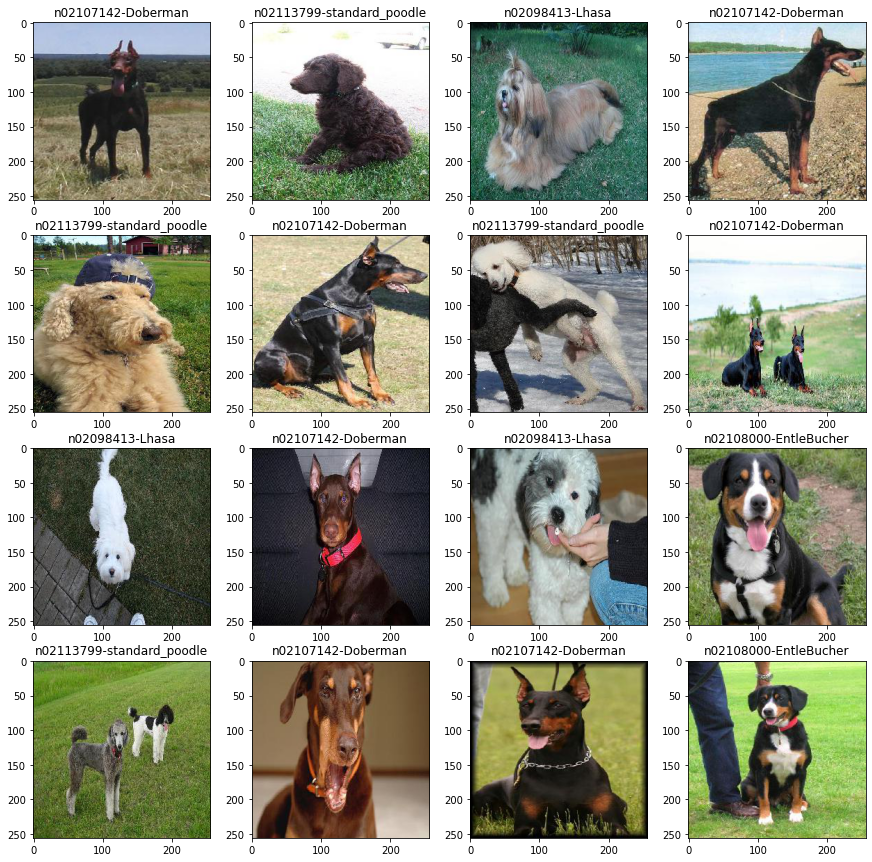

In [16]:
image,label=next(X_augm)
show_batch(image,label)

## Brightness

In [17]:
# Brightness
datagen = ImageDataGenerator(rescale=1./255, brightness_range= [0.5, 1.6])
X_augm = datagen.flow_from_directory(export_data_dir, batch_size = batch_size, seed=seed, classes = name_classes, color_mode='rgb')

Found 500 images belonging to 120 classes.


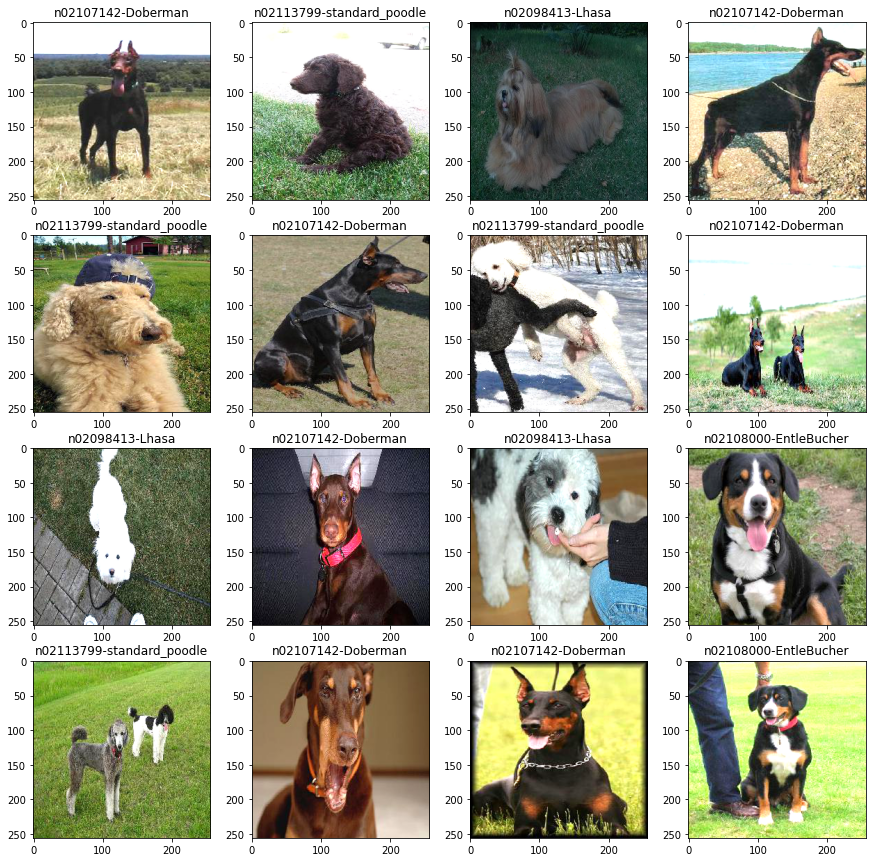

In [18]:
image,label=next(X_augm)
show_batch(image,label)

## Random flips

In [19]:
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip =True)
X_augm = datagen.flow_from_directory(export_data_dir, batch_size = batch_size, seed=seed, classes = name_classes)

Found 500 images belonging to 120 classes.


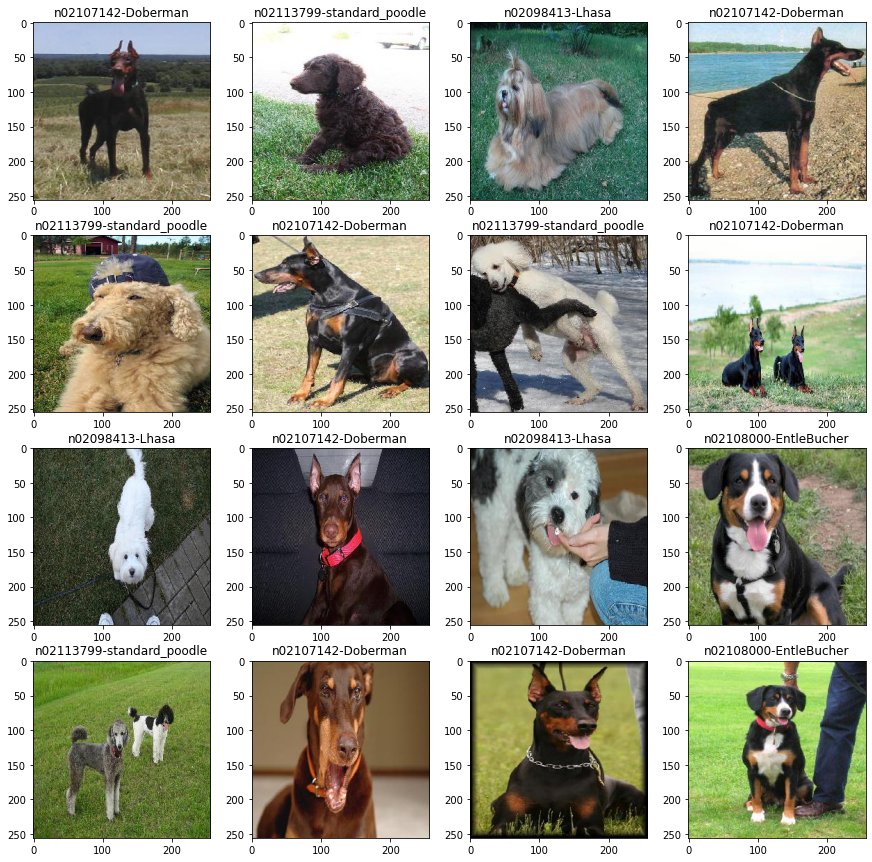

In [20]:
image,label=next(X_augm)
show_batch(image,label)

## Random rotations

In [37]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=15)
X_augm = datagen.flow_from_directory(export_data_dir, batch_size = batch_size, seed=seed, classes = name_classes, color_mode='rgb')

Found 500 images belonging to 120 classes.


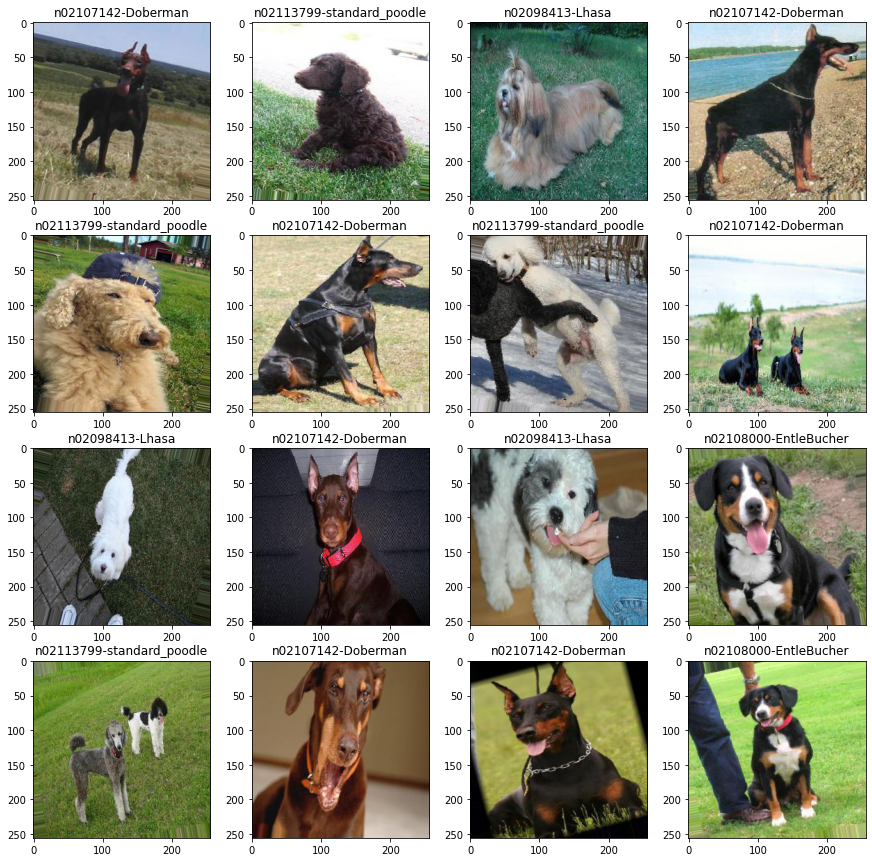

In [38]:
image,label=next(X_augm)
show_batch(image,label)

## Brightness + random rotation + random flips


In [39]:
datagen = ImageDataGenerator(rescale=1./255, 
                             brightness_range= [0.5, 1.6], 
                             horizontal_flip =True, 
                             rotation_range=15)
X_augm = datagen.flow_from_directory(export_data_dir, batch_size = batch_size, seed=seed, classes = name_classes, color_mode='rgb')

Found 500 images belonging to 120 classes.


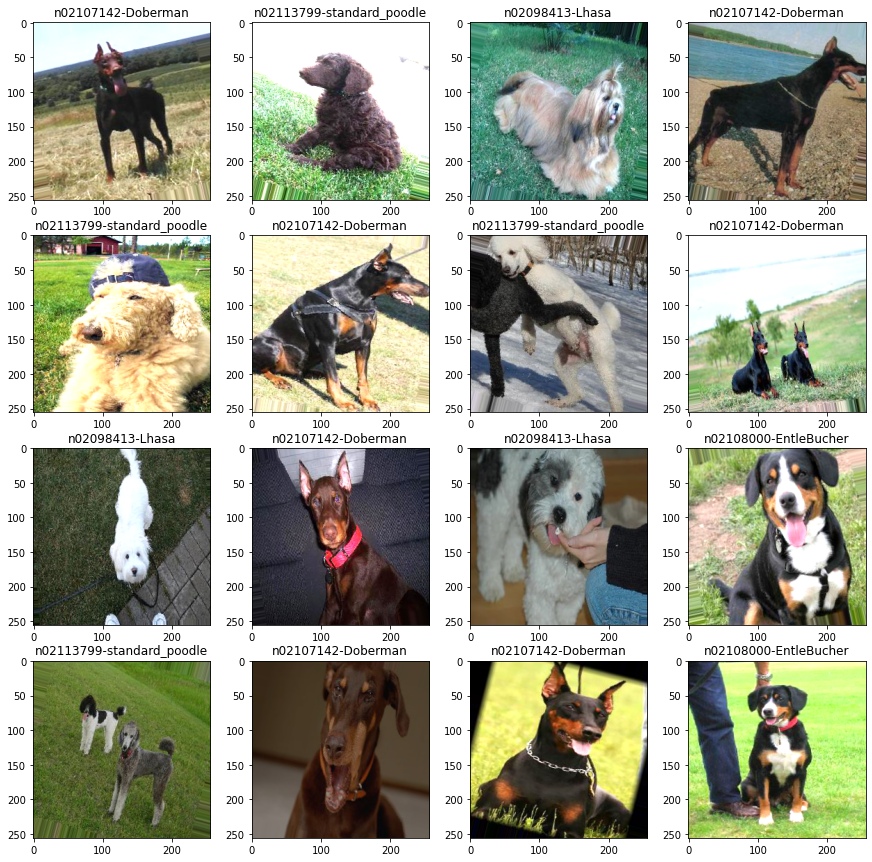

In [40]:
image,label=next(X_augm)
show_batch(image,label)

In [ ]:
os.getcwd()

'/content/gdrive/My Drive/Colab_Notebooks/Projet-6'

# Création d'un CNN

## Différents modèles

### From scratch №1

In [ ]:
my_CNN = Sequential()
my_CNN.add(Convolution2D(64,(3,3), input_shape = (256,256,3), padding = 'same', activation = 'relu'))
my_CNN.add(Convolution2D(64, (3,3), padding = 'same', activation = 'relu'))
my_CNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
my_CNN.add(Flatten())
my_CNN.add(Dense(5, activation = 'softmax'))
my_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_376 (Conv2D)          (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_377 (Conv2D)          (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1048576)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 5242885   
Total params: 5,281,605
Trainable params: 5,281,605
Non-trainable params: 0
_________________________________________________________________


### From scratch №2

In [ ]:
my_CNN2 = Sequential()
my_CNN2.add(Convolution2D(16, 3,3, input_shape=(256,256,3), padding='same', activation='relu'))
my_CNN2.add(MaxPooling2D(pool_size=(2,2)))
my_CNN2.add(Convolution2D(32, 3, 3, padding = 'same', activation = 'relu'))
my_CNN2.add(MaxPooling2D(pool_size=(2,2)))
my_CNN2.add(Convolution2D(64, 3, 3, padding = 'same', activation = 'relu'))
my_CNN2.add(MaxPooling2D(pool_size=(2,2)))
my_CNN2.add(Convolution2D(128, 3, 3, padding = 'same', activation = 'relu'))
my_CNN2.add(MaxPooling2D(pool_size=(2,2), padding='same'))
my_CNN2.add(Flatten())
my_CNN2.add(Dense(5, activation='softmax'))
my_CNN2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 86, 86, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 128)        

### From scratch №3

#### 5 classes

In [ ]:
CNN3_5C = Sequential()

CNN3_5C.add(Convolution2D(32, 3, 3, input_shape=(256,256,3), padding='same', activation='relu'))
CNN3_5C.add(MaxPooling2D((2,2), strides=(2,2)))
CNN3_5C.add(Convolution2D(64, 3, 3, padding='same', activation='relu'))
CNN3_5C.add(MaxPooling2D((2,2), strides=(2,2)))
CNN3_5C.add(Convolution2D(128, 3, 3, padding='same', activation='relu'))
CNN3_5C.add(MaxPooling2D((2,2), strides=(2,2)))
CNN3_5C.add(Convolution2D(256, 3, 3, padding='same', activation='relu'))
CNN3_5C.add(MaxPooling2D((2,2), padding='same'))
CNN3_5C.add(Convolution2D(256, 3, 3, padding='same', activation='relu'))
CNN3_5C.add(MaxPooling2D((2,2), padding='same'))

CNN3_5C.add(Flatten())
CNN3_5C.add(Dense(128, activation='relu'))
CNN3_5C.add(Dropout(0.5)) #prevent overfitting
CNN3_5C.add(Dense(64, activation = 'relu'))
CNN3_5C.add(Dropout(0.5))
CNN3_5C.add(Dense(5, activation='softmax'))

CNN3_5C.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_472 (Conv2D)          (None, 86, 86, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_473 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_474 (Conv2D)          (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_475 (Conv2D)          (None, 1, 1, 256)        

#### 120 classes

In [ ]:
CNN3_120C = Sequential()

CNN3_120C.add(Convolution2D(32, 3, 3, input_shape=(256,256,3), padding='same', activation='relu'))
CNN3_120C.add(MaxPooling2D((2,2), strides=(2,2)))
CNN3_120C.add(Convolution2D(64, 3, 3, padding='same', activation='relu'))
CNN3_120C.add(MaxPooling2D((2,2), strides=(2,2)))
CNN3_120C.add(Convolution2D(128, 3, 3, padding='same', activation='relu'))
CNN3_120C.add(MaxPooling2D((2,2), strides=(2,2)))
CNN3_120C.add(Convolution2D(256, 3, 3, padding='same', activation='relu'))
CNN3_120C.add(MaxPooling2D((2,2), padding='same'))
CNN3_120C.add(Convolution2D(256, 3, 3, padding='same', activation='relu'))
CNN3_120C.add(MaxPooling2D((2,2), padding='same'))

CNN3_120C.add(Flatten())
CNN3_120C.add(Dense(128, activation='relu'))
CNN3_120C.add(Dropout(0.5)) #prevent overfitting
CNN3_120C.add(Dense(64, activation = 'relu'))
CNN3_120C.add(Dropout(0.5))
CNN3_120C.add(Dense(120, activation='softmax'))

CNN3_120C.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 86, 86, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 256)        

#### Test de VGG-16

In [ ]:
VGG_16 = Sequential()
VGG_16.add(ZeroPadding2D((1,1),input_shape=(3,256,256)))
VGG_16.add(Convolution2D(64, 3, 3, activation='relu'))
VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(64, 3, 3, activation='relu'))
VGG_16.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(128, 3, 3, activation='relu'))
VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(128, 3, 3, activation='relu'))
VGG_16.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(256, 3, 3, activation='relu'))
VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(256, 3, 3, activation='relu'))
VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(256, 3, 3, activation='relu'))
VGG_16.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(512, 3, 3, activation='relu'))
VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(512, 3, 3, activation='relu'))
VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(512, 3, 3, activation='relu'))
VGG_16.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(512, 3, 3, activation='relu'))
VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(512, 3, 3, activation='relu'))
VGG_16.add(ZeroPadding2D((1,1)))
VGG_16.add(Convolution2D(512, 3, 3, activation='relu'))
VGG_16.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

VGG_16.add(Flatten())
VGG_16.add(Dense(4096, activation='relu'))
VGG_16.add(Dropout(0.5))
VGG_16.add(Dropout(0.5))
VGG_16.add(Dense(1000, activation='softmax'))

VGG_16.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 5, 258, 256)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 1, 86, 64)         147520    
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 3, 88, 64)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 29, 64)         36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 15, 64)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 3, 17, 64)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 5, 128)        

### Modification de VGG-16

In [ ]:
modif_VGG = Sequential()
modif_VGG.add(ZeroPadding2D((1,1),input_shape=(256,256,3)))
modif_VGG.add(Convolution2D(64, 3, 3, activation='relu'))
modif_VGG.add(ZeroPadding2D((1,1)))
modif_VGG.add(Convolution2D(64, 3, 3, activation='relu'))
modif_VGG.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

modif_VGG.add(ZeroPadding2D((1,1)))
modif_VGG.add(Convolution2D(128, 3, 3, activation='relu'))
modif_VGG.add(ZeroPadding2D((1,1)))
modif_VGG.add(Convolution2D(128, 3, 3, activation='relu'))
modif_VGG.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

modif_VGG.add(ZeroPadding2D((1,1)))
modif_VGG.add(Convolution2D(256, 3, 3, activation='relu'))
modif_VGG.add(ZeroPadding2D((1,1)))
modif_VGG.add(Convolution2D(256, 3, 3, activation='relu'))
modif_VGG.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

modif_VGG.add(Flatten())
modif_VGG.add(Dense(128, activation='relu'))
modif_VGG.add(Dropout(0.5))
modif_VGG.add(Dense(64, activation='relu'))
modif_VGG.add(Dropout(0.5))
modif_VGG.add(Dense(5, activation='softmax'))

modif_VGG.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 86, 86, 64)        1792      
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 88, 88, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 5, 5, 128)        

# Compiler et entrainer

# Compilation, entrainement et visualisation

## Préparation des données

In [48]:
# Prepare data train et test with 5 classes without augmentation
def split_datagen_export():
    datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2 )

    X_train = datagen.flow_from_directory(
                    '/content/gdrive/MyDrive/Colab_Notebooks/Projet-6/to_export',
                    subset='training', seed = seed)

    X_test = datagen.flow_from_directory(
                    '/content/gdrive/MyDrive/Colab_Notebooks/Projet-6/to_export',
                    subset='validation', seed = seed)
    
    return X_train, X_test

In [49]:
# Prepare data train with 5 classes with augmentation
def image_datagen_load_augmentation():
    datagen = ImageDataGenerator(rescale=1/255, 
                                 validation_split=0.2, 
                                 brightness_range= [0.5, 1.6],  
                                 horizontal_flip =True )

    train_datagen = datagen.flow_from_directory(
                    '/content/gdrive/MyDrive/Colab_Notebooks/Projet-6/to_export',
                    subset='training', seed = seed)
    
    return train_datagen

In [50]:
X5_train, X5_test = split_datagen_export()
X5_train_augm = image_datagen_load_augmentation()

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 400 images belonging to 5 classes.


In [76]:
# Add callbacks
# Create paths 
#log_path = os.path.join(os.getcwd(), 'logs')
name_checkpoint = 'CP-saved-{}'.format(int(time.time()))
CP_path = 'saved_models/{}.h5'.format(name_checkpoint)

# Initialize callbacks
#tensorboard_callback = TensorBoard(log_dir = 'logs/{}'.format(name_logs), histogram_freq=1)
checkpoint_cb = ModelCheckpoint(CP_path, save_best_only=True)
early_stopping_cd = EarlyStopping(monitor = 'val_accuracy', patience=8)


In [75]:
batch_size = 80
epochs = 10

## Modèle 1 - 5 classes

Nombre de classes: 5 \
Optimizer: SGD \
Learning_rate: 0,0001

In [ ]:
# Compile model 
CNN3_5C.compile(loss="categorical_crossentropy", 
                optimizer=SGD(lr=0.0001, momentum=0.9), 
                metrics=["accuracy"])

### Sans augmentation

In [ ]:
# Fit model on export generator

start = time.time()
history_sgd_5 = CNN3_5C.fit_generator(X5_train, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time()-start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 - 2s - loss: 1.6094 - accuracy: 0.1842 - val_loss: 1.6090 - val_accuracy: 0.1875
Epoch 2/10
10/10 - 1s - loss: 1.6094 - accuracy: 0.2270 - val_loss: 1.6088 - val_accuracy: 0.1979
Epoch 3/10
10/10 - 1s - loss: 1.6090 - accuracy: 0.2138 - val_loss: 1.6087 - val_accuracy: 0.2083
Epoch 4/10
10/10 - 1s - loss: 1.6094 - accuracy: 0.1941 - val_loss: 1.6090 - val_accuracy: 0.1771
Epoch 5/10
10/10 - 1s - loss: 1.6088 - accuracy: 0.2281 - val_loss: 1.6087 - val_accuracy: 0.2083
Epoch 6/10
10/10 - 1s - loss: 1.6090 - accuracy: 0.2303 - val_loss: 1.6089 - val_accuracy: 0.2083
Epoch 7/10
10/10 - 1s - loss: 1.6094 - accuracy: 0.1974 - val_loss: 1.6088 - val_accuracy: 0.1979
Epoch 8/10
10/10 - 1s - loss: 1.6087 - accuracy: 0.2204 - val_loss: 1.6089 - val_accuracy: 0.1979
Epoch 9/10
10/10 - 1s - loss: 1.6090 - accuracy: 0.2072 - val_loss: 1.6088 - val_accuracy: 0.1979
Epoch 10/10
10/10 - 1s - loss: 1.6094 - accuracy: 0.2105 - val_loss: 1.6089 - val_accuracy: 0.1771
Execution time:  13

In [ ]:
# Does not work on Colab
#%tensorboard --logdir logs

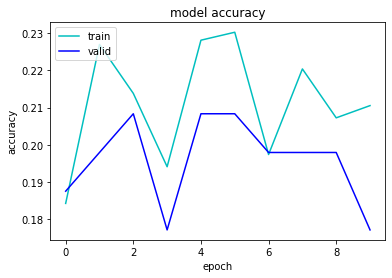

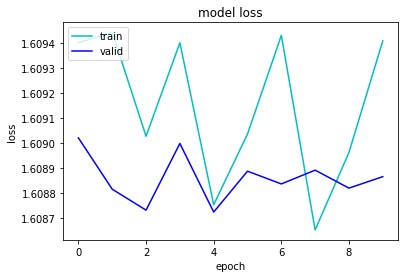

In [ ]:
# summarize history for accuracy
plt.plot(history_sgd_5.history['accuracy'], 'c-')
plt.plot(history_sgd_5.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_sgd_5.history['loss'], 'c-')
plt.plot(history_sgd_5.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### Avec augmentation

In [ ]:
# Fit model on export generator

start = time.time()
history_augm_5c = CNN3_5C.fit_generator(X5_train_augm, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time()-start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 - 33s - loss: 1.6091 - accuracy: 0.2303 - val_loss: 1.6094 - val_accuracy: 0.1979
Epoch 2/10
10/10 - 7s - loss: 1.6096 - accuracy: 0.1842 - val_loss: 1.6094 - val_accuracy: 0.1458
Epoch 3/10
10/10 - 3s - loss: 1.6099 - accuracy: 0.1678 - val_loss: 1.6094 - val_accuracy: 0.1667
Epoch 4/10
10/10 - 2s - loss: 1.6096 - accuracy: 0.1908 - val_loss: 1.6094 - val_accuracy: 0.2083
Epoch 5/10
10/10 - 2s - loss: 1.6091 - accuracy: 0.1974 - val_loss: 1.6094 - val_accuracy: 0.1875
Epoch 6/10
10/10 - 2s - loss: 1.6094 - accuracy: 0.1974 - val_loss: 1.6094 - val_accuracy: 0.1979
Epoch 7/10
10/10 - 2s - loss: 1.6093 - accuracy: 0.1842 - val_loss: 1.6093 - val_accuracy: 0.1979
Epoch 8/10
10/10 - 2s - loss: 1.6094 - accuracy: 0.1711 - val_loss: 1.6094 - val_accuracy: 0.2500
Epoch 9/10
10/10 - 2s - loss: 1.6098 - accuracy: 0.1743 - val_loss: 1.6094 - val_accuracy: 0.2188
Epoch 10/10
10/10 - 2s - loss: 1.6093 - accuracy: 0.2138 - val_loss: 1.6093 - val_accuracy: 0.2500
Execution time:  5

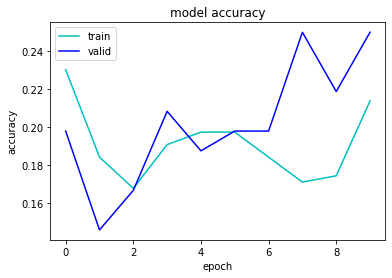

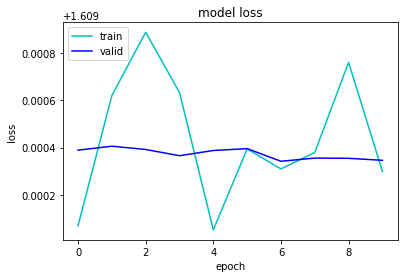

In [ ]:
# summarize history for accuracy
plt.plot(history_augm_5c.history['accuracy'], 'c-')
plt.plot(history_augm_5c.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_augm_5c.history['loss'], 'c-')
plt.plot(history_augm_5c.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Modèle 2 - 5 classes

Nombre de classes: 5 \
Optimizer: Adam \
Learning_rate: 0,0001

### Sans augmentation

In [ ]:
# Compile model 
CNN3_5C.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

In [ ]:
# Fit model on export generator

start = time.time()
history_5_adam = CNN3_5C.fit_generator(X5_train, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time()-start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 - 2s - loss: 1.6092 - accuracy: 0.2270 - val_loss: 1.6087 - val_accuracy: 0.2083
Epoch 2/10
10/10 - 1s - loss: 1.6081 - accuracy: 0.2406 - val_loss: 1.6085 - val_accuracy: 0.2708
Epoch 3/10
10/10 - 1s - loss: 1.6086 - accuracy: 0.2204 - val_loss: 1.6083 - val_accuracy: 0.3333
Epoch 4/10
10/10 - 1s - loss: 1.6084 - accuracy: 0.2531 - val_loss: 1.6078 - val_accuracy: 0.3333
Epoch 5/10
10/10 - 1s - loss: 1.6065 - accuracy: 0.2406 - val_loss: 1.6076 - val_accuracy: 0.3333
Epoch 6/10
10/10 - 1s - loss: 1.6075 - accuracy: 0.2094 - val_loss: 1.6071 - val_accuracy: 0.1979
Epoch 7/10
10/10 - 1s - loss: 1.6072 - accuracy: 0.2303 - val_loss: 1.6061 - val_accuracy: 0.1979
Epoch 8/10
10/10 - 1s - loss: 1.6058 - accuracy: 0.2039 - val_loss: 1.6053 - val_accuracy: 0.1979
Epoch 9/10
10/10 - 1s - loss: 1.6054 - accuracy: 0.2336 - val_loss: 1.6038 - val_accuracy: 0.2292
Epoch 10/10
10/10 - 1s - loss: 1.6050 - accuracy: 0.2434 - val_loss: 1.6020 - val_accuracy: 0.2188
Execution time:  13

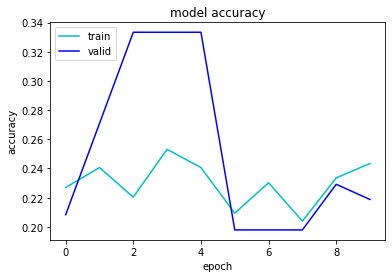

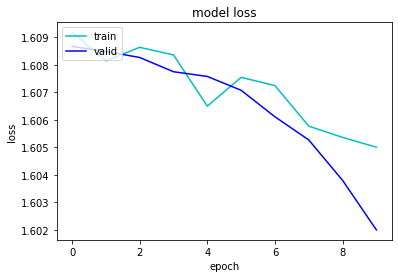

In [ ]:
# summarize history for accuracy
plt.plot(history_5_adam.history['accuracy'], 'c-')
plt.plot(history_5_adam.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_5_adam.history['loss'], 'c-')
plt.plot(history_5_adam.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### Avec augmentation

In [ ]:
# Fit model on export generator

start = time.time()
history_augm_5c_2 = CNN3_5C.fit_generator(X5_train_augm, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time()-start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 - 2s - loss: 1.6039 - accuracy: 0.2171 - val_loss: 1.5991 - val_accuracy: 0.3021
Epoch 2/10
10/10 - 2s - loss: 1.6013 - accuracy: 0.2406 - val_loss: 1.5967 - val_accuracy: 0.3333
Epoch 3/10
10/10 - 2s - loss: 1.5966 - accuracy: 0.2500 - val_loss: 1.5906 - val_accuracy: 0.3229
Epoch 4/10
10/10 - 2s - loss: 1.5922 - accuracy: 0.2632 - val_loss: 1.5812 - val_accuracy: 0.3646
Epoch 5/10
10/10 - 2s - loss: 1.5801 - accuracy: 0.3026 - val_loss: 1.5726 - val_accuracy: 0.3646
Epoch 6/10
10/10 - 2s - loss: 1.5682 - accuracy: 0.2599 - val_loss: 1.5532 - val_accuracy: 0.3333
Epoch 7/10
10/10 - 2s - loss: 1.5596 - accuracy: 0.2531 - val_loss: 1.5341 - val_accuracy: 0.3333
Epoch 8/10
10/10 - 2s - loss: 1.5655 - accuracy: 0.2469 - val_loss: 1.5177 - val_accuracy: 0.3333
Epoch 9/10
10/10 - 2s - loss: 1.5468 - accuracy: 0.2730 - val_loss: 1.5099 - val_accuracy: 0.3333
Epoch 10/10
10/10 - 2s - loss: 1.5119 - accuracy: 0.3059 - val_loss: 1.4959 - val_accuracy: 0.3542
Execution time:  21

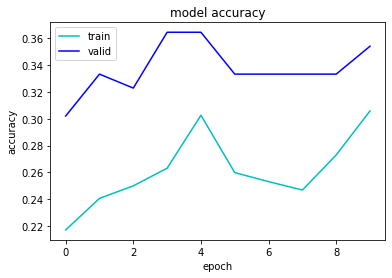

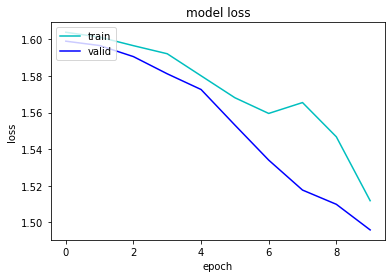

In [ ]:
# summarize history for accuracy
plt.plot(history_augm_5c_2.history['accuracy'], 'c-')
plt.plot(history_augm_5c_2.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_augm_5c_2.history['loss'], 'c-')
plt.plot(history_augm_5c_2.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Modèle 3 - 120 classes

Nombre de classes: 120 \
Optimizer: SGD \
Learning_rate: 0,0001

In [ ]:
# Compile model 
CNN3_120C.compile(loss="categorical_crossentropy", 
                optimizer=SGD(lr=0.0001, momentum=0.9), 
                metrics=["accuracy"])

In [ ]:
# Fit model on generator (120 classes)

start = time.time()
history_sgd = CNN3_120C.fit_generator(train_datagen, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2, 
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 - 235s - loss: 4.7876 - accuracy: 0.0031 - val_loss: 4.7874 - val_accuracy: 0.0208
INFO:tensorflow:Assets written to: saved_models/CP-saved-1611653579/assets
Epoch 2/10
10/10 - 211s - loss: 4.7876 - accuracy: 0.0125 - val_loss: 4.7873 - val_accuracy: 0.0208
Epoch 3/10
10/10 - 193s - loss: 4.7878 - accuracy: 0.0063 - val_loss: 4.7876 - val_accuracy: 0.0104
Epoch 4/10
10/10 - 180s - loss: 4.7874 - accuracy: 0.0063 - val_loss: 4.7873 - val_accuracy: 0.0104
Epoch 00004: early stopping
Execution time:  839.6646370887756


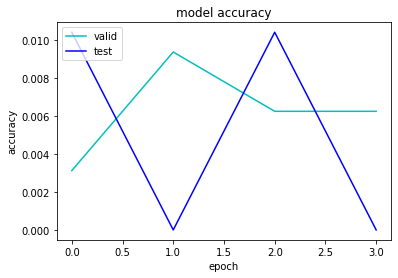

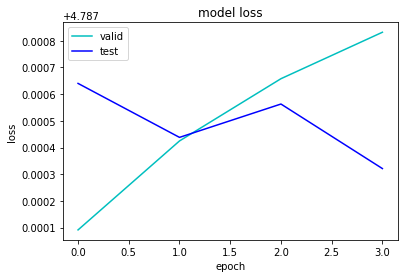

In [ ]:
# summarize history for accuracy
plt.plot(history_sgd.history['accuracy'], 'c-')
plt.plot(history_sgd.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_sgd.history['loss'], 'c-')
plt.plot(history_sgd.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Modèle 4 - 120 classes

Nombre de classes: 120 \
Optimizer: Adam \
Learning_rate: 0,0001

In [ ]:
# Compile model 
CNN3_120C.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

In [ ]:
# Fit model on generator (120 classes)

start = time.time()
history_adam = CNN3_120C.fit_generator(train_datagen, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2, 
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 - 161s - loss: 4.7870 - accuracy: 0.0188 - val_loss: 4.7872 - val_accuracy: 0.0208
Epoch 2/10
10/10 - 158s - loss: 4.7875 - accuracy: 0.0063 - val_loss: 4.7880 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 - 160s - loss: 4.7869 - accuracy: 0.0031 - val_loss: 4.7881 - val_accuracy: 0.0104
Epoch 4/10
10/10 - 143s - loss: 4.7882 - accuracy: 0.0031 - val_loss: 4.7862 - val_accuracy: 0.0208
Epoch 00004: early stopping
Execution time:  637.4600026607513


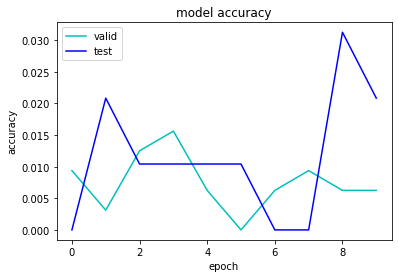

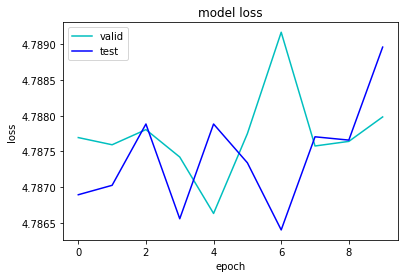

In [ ]:
# summarize history for accuracy
plt.plot(history_adam.history['accuracy'], 'c-')
plt.plot(history_adam.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_adam.history['loss'], 'c-')
plt.plot(history_adam.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Modèle 5 - 120 classes

Nombre de classes: 120 \
Optimizer: Adam \
Learning_rate: 0,001

In [ ]:
# Compile model 
CNN3_120C.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.001), 
                metrics=["accuracy"])

In [ ]:
# Fit model on generator (120 classes)

start = time.time()
history_adam_2 = CNN3_120C.fit_generator(train_datagen, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2, 
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 - 155s - loss: 4.7877 - accuracy: 0.0125 - val_loss: 4.7888 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 - 134s - loss: 4.7907 - accuracy: 0.0125 - val_loss: 4.7924 - val_accuracy: 0.0104
Epoch 3/10
10/10 - 127s - loss: 4.7873 - accuracy: 0.0125 - val_loss: 4.7884 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 - 122s - loss: 4.7864 - accuracy: 0.0031 - val_loss: 4.7884 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 - 121s - loss: 4.7868 - accuracy: 0.0219 - val_loss: 4.7887 - val_accuracy: 0.0000e+00
Epoch 00005: early stopping
Execution time:  671.0076365470886


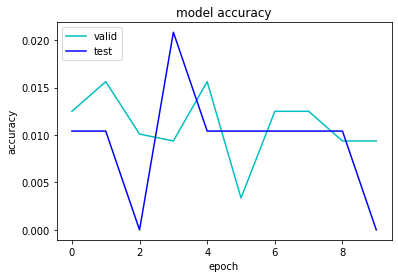

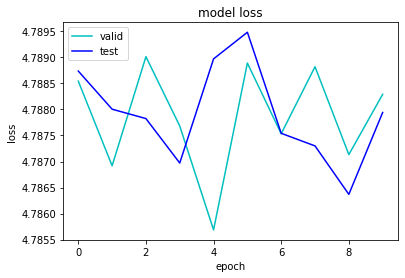

In [ ]:
# summarize history for accuracy
plt.plot(history_adam_2.history['accuracy'], 'c-')
plt.plot(history_adam_2.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_adam_2.history['loss'], 'c-')
plt.plot(history_adam_2.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Modèle 6 - 120 classes

Nombre de classes: 120 \
Optimizer: Adagrad \
Learning_rate: 0,001

In [ ]:
# Compile model 
CNN3_120C.compile(loss="categorical_crossentropy", 
                optimizer=Adagrad(learning_rate=0.001), 
                metrics=["accuracy"])

In [ ]:
# Fit model on generator (120 classes)

start = time.time()
history_adagrad = CNN3_120C.fit_generator(train_datagen, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2, 
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 - 121s - loss: 4.7881 - accuracy: 0.0094 - val_loss: 4.7907 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 - 115s - loss: 4.7887 - accuracy: 0.0031 - val_loss: 4.7895 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 - 110s - loss: 4.7868 - accuracy: 0.0063 - val_loss: 4.7876 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 - 108s - loss: 4.7880 - accuracy: 0.0031 - val_loss: 4.7831 - val_accuracy: 0.0208
Epoch 5/10
10/10 - 92s - loss: 4.7883 - accuracy: 0.0000e+00 - val_loss: 4.7879 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 - 88s - loss: 4.7885 - accuracy: 0.0125 - val_loss: 4.7873 - val_accuracy: 0.0208
Epoch 7/10
10/10 - 86s - loss: 4.7896 - accuracy: 0.0063 - val_loss: 4.7889 - val_accuracy: 0.0000e+00
Epoch 00007: early stopping
Execution time:  727.9348232746124


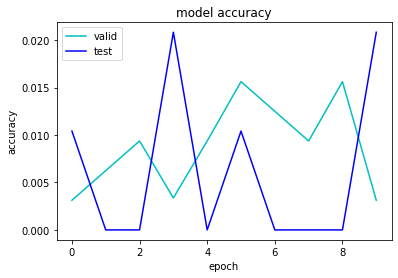

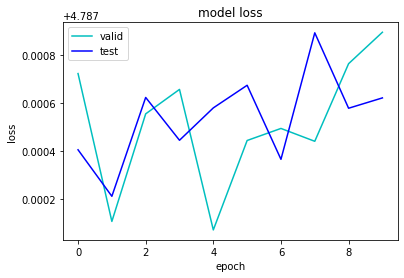

In [ ]:
# summarize history for accuracy
plt.plot(history_adagrad.history['accuracy'], 'c-')
plt.plot(history_adagrad.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_adagrad.history['loss'], 'c-')
plt.plot(history_adagrad.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Modèle 7 - 120 classes

Nombre de classes: 120 \
Optimizer: Adagrad \
Learning_rate: 0,0001

In [ ]:
# Compile model 
CNN3_120C.compile(loss="categorical_crossentropy", 
                optimizer=Adagrad(learning_rate=0.0001), 
                metrics=["accuracy"])

In [ ]:
# Fit model on generator (120 classes)

start = time.time()
history_adagrad_2 = CNN3_120C.fit_generator(train_datagen, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2, 
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 - 87s - loss: 4.7881 - accuracy: 0.0063 - val_loss: 4.7890 - val_accuracy: 0.0104
Epoch 2/10
10/10 - 81s - loss: 4.7876 - accuracy: 0.0031 - val_loss: 4.7870 - val_accuracy: 0.0312
Epoch 3/10
10/10 - 74s - loss: 4.7875 - accuracy: 0.0031 - val_loss: 4.7881 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 - 71s - loss: 4.7862 - accuracy: 0.0094 - val_loss: 4.7882 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 - 61s - loss: 4.7901 - accuracy: 0.0094 - val_loss: 4.7870 - val_accuracy: 0.0000e+00
Epoch 00005: early stopping
Execution time:  382.33090925216675


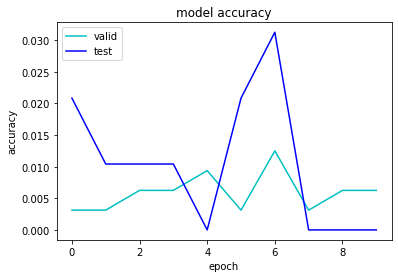

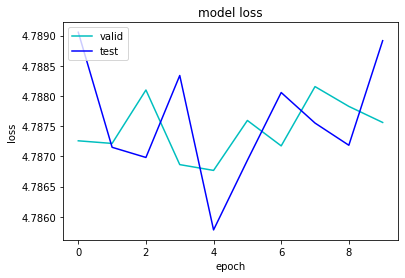

In [ ]:
# summarize history for accuracy
plt.plot(history_adagrad_2.history['accuracy'], 'c-')
plt.plot(history_adagrad_2.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_adagrad_2.history['loss'], 'c-')
plt.plot(history_adagrad_2.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Transfert Learning

## Modèle VGG-16

### Extraction de features

In [98]:
epochs = 20

#### ResNet

In [21]:
# load model without last layer
model_RN = ResNet50(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the layers to not trainable
for layer in model_RN.layers:
   layer.trainable = False

# summarize the model
model_RN.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_RN.output)
output = Dense(5, activation = 'softmax')(avg)
new_RN = tf.keras.Model(inputs = model_RN.input, outputs = output)

94773248/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

##### Modèle 1: SGD

In [ ]:
# Compile model 
new_RN.compile(loss="categorical_crossentropy", 
                optimizer=SGD(lr=0.0001, momentum=0.9), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_RN_1 = new_RN.fit(X5_train , validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/10
10/10 - 5s - loss: 1.7387 - accuracy: 0.1908 - val_loss: 1.6257 - val_accuracy: 0.1979
Epoch 2/10
10/10 - 1s - loss: 1.6385 - accuracy: 0.1447 - val_loss: 1.6346 - val_accuracy: 0.1979
Epoch 3/10
10/10 - 2s - loss: 1.6428 - accuracy: 0.2105 - val_loss: 1.6158 - val_accuracy: 0.1979
Epoch 4/10
10/10 - 2s - loss: 1.6261 - accuracy: 0.1382 - val_loss: 1.6094 - val_accuracy: 0.2083
Epoch 5/10
10/10 - 2s - loss: 1.6222 - accuracy: 0.1711 - val_loss: 1.6100 - val_accuracy: 0.1667
Epoch 6/10
10/10 - 1s - loss: 1.6275 - accuracy: 0.1645 - val_loss: 1.6085 - val_accuracy: 0.1562
Epoch 7/10
10/10 - 1s - loss: 1.6198 - accuracy: 0.1118 - val_loss: 1.6044 - val_accuracy: 0.2188
Epoch 8/10
10/10 - 2s - loss: 1.6203 - accuracy: 0.1781 - val_loss: 1.6060 - val_accuracy: 0.2083
Epoch 9/10
10/10 - 2s - loss: 1.6192 - accuracy: 0.1344 - val_loss: 1.6073 - val_accuracy: 0.1667
Epoch 10/10
10/10 - 1s - loss: 1.6146 - accuracy: 0.1579 - val_loss: 1.6069 - val_accuracy: 0.1771
Execution time:  19

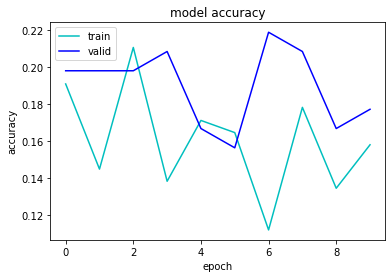

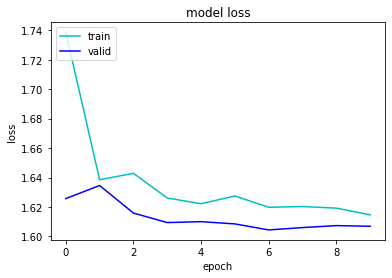

In [ ]:
# summarize history for accuracy
plt.plot(history_RN_1.history['accuracy'], 'c-')
plt.plot(history_RN_1.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_RN_1.history['loss'], 'c-')
plt.plot(history_RN_1.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

##### Modèle 2: Adam

In [ ]:
new_RN.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_RN_2 = new_RN.fit(X5_train, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/10
10/10 - 5s - loss: 1.6192 - accuracy: 0.1447 - val_loss: 1.6047 - val_accuracy: 0.2188
Epoch 2/10
10/10 - 2s - loss: 1.6138 - accuracy: 0.1842 - val_loss: 1.6017 - val_accuracy: 0.2396
Epoch 3/10
10/10 - 2s - loss: 1.6131 - accuracy: 0.1625 - val_loss: 1.6014 - val_accuracy: 0.2083
Epoch 4/10
10/10 - 2s - loss: 1.6092 - accuracy: 0.1546 - val_loss: 1.6004 - val_accuracy: 0.1667
Epoch 5/10
10/10 - 2s - loss: 1.6084 - accuracy: 0.1217 - val_loss: 1.5994 - val_accuracy: 0.2500
Epoch 6/10
10/10 - 2s - loss: 1.6041 - accuracy: 0.1776 - val_loss: 1.5977 - val_accuracy: 0.2292
Epoch 7/10
10/10 - 2s - loss: 1.6047 - accuracy: 0.1776 - val_loss: 1.5957 - val_accuracy: 0.1979
Epoch 8/10
10/10 - 2s - loss: 1.6010 - accuracy: 0.2204 - val_loss: 1.5930 - val_accuracy: 0.2083
Epoch 9/10
10/10 - 2s - loss: 1.5996 - accuracy: 0.3092 - val_loss: 1.5930 - val_accuracy: 0.2396
Epoch 10/10
10/10 - 2s - loss: 1.5962 - accuracy: 0.2829 - val_loss: 1.5920 - val_accuracy: 0.2396
Execution time:  18

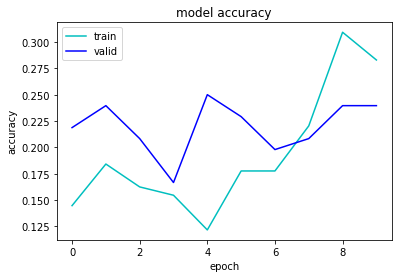

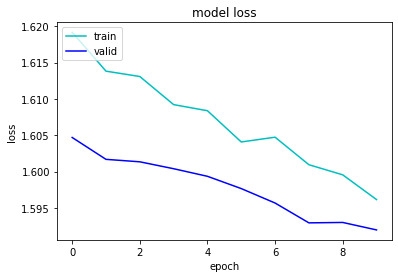

In [ ]:
# summarize history for accuracy
plt.plot(history_RN_2.history['accuracy'], 'c-')
plt.plot(history_RN_2.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_RN_2.history['loss'], 'c-')
plt.plot(history_RN_2.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

#### VGG-16

In [26]:
# load model without last layer
model_VGG = VGG16(include_top=False, input_shape=(256, 256, 3), weights= 'imagenet')

# Set up the layers to not trainable
for layer in model_VGG.layers:
   layer.trainable = False

# summarize the model
model_VGG.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_VGG.output)
output = Dense(5, activation = 'softmax')(avg)
new_vgg = tf.keras.Model(inputs = model_VGG.input, outputs = output)

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

##### Modèle 1: SGD

In [ ]:
# Compile model 
new_vgg.compile(loss="categorical_crossentropy", 
                optimizer=SGD(lr=0.0001, momentum=0.9), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_vgg_1= new_vgg.fit(X5_train, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/10
10/10 - 3s - loss: 1.9540 - accuracy: 0.2500 - val_loss: 1.9386 - val_accuracy: 0.1771
Epoch 2/10
10/10 - 2s - loss: 1.8706 - accuracy: 0.2368 - val_loss: 1.8438 - val_accuracy: 0.1979
Epoch 3/10
10/10 - 1s - loss: 1.7649 - accuracy: 0.2368 - val_loss: 1.7465 - val_accuracy: 0.2188
Epoch 4/10
10/10 - 2s - loss: 1.6977 - accuracy: 0.2344 - val_loss: 1.7071 - val_accuracy: 0.1979
Epoch 5/10
10/10 - 2s - loss: 1.6550 - accuracy: 0.2500 - val_loss: 1.6786 - val_accuracy: 0.1875
Epoch 6/10
10/10 - 2s - loss: 1.6364 - accuracy: 0.2406 - val_loss: 1.6464 - val_accuracy: 0.2188
Epoch 7/10
10/10 - 2s - loss: 1.6263 - accuracy: 0.2125 - val_loss: 1.6336 - val_accuracy: 0.1875
Epoch 8/10
10/10 - 1s - loss: 1.6156 - accuracy: 0.1974 - val_loss: 1.6330 - val_accuracy: 0.1771
Epoch 9/10
10/10 - 2s - loss: 1.6104 - accuracy: 0.2125 - val_loss: 1.6289 - val_accuracy: 0.1354
Epoch 10/10
10/10 - 2s - loss: 1.6091 - accuracy: 0.1906 - val_loss: 1.6237 - val_accuracy: 0.1875
Execution time:  17

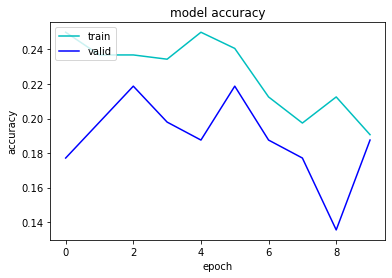

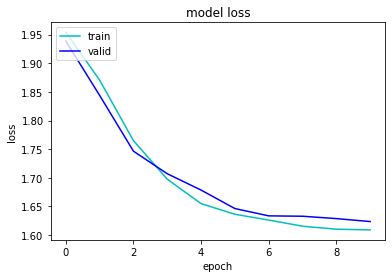

In [ ]:
# summarize history for accuracy
plt.plot(history_vgg_1.history['accuracy'], 'c-')
plt.plot(history_vgg_1.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_vgg_1.history['loss'], 'c-')
plt.plot(history_vgg_1.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

##### Modèle 2: Adam

In [27]:
# Compile model 
new_vgg.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_vgg_2= new_vgg.fit(X5_train, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/10
10/10 - 5s - loss: 1.8572 - accuracy: 0.1875 - val_loss: 1.7765 - val_accuracy: 0.1771
Epoch 2/10
10/10 - 2s - loss: 1.7639 - accuracy: 0.2303 - val_loss: 1.7423 - val_accuracy: 0.1979
Epoch 3/10
10/10 - 2s - loss: 1.7052 - accuracy: 0.2303 - val_loss: 1.7053 - val_accuracy: 0.1979
Epoch 4/10
10/10 - 2s - loss: 1.6967 - accuracy: 0.2250 - val_loss: 1.7017 - val_accuracy: 0.1562
Epoch 5/10
10/10 - 2s - loss: 1.6719 - accuracy: 0.2406 - val_loss: 1.6843 - val_accuracy: 0.1667
Epoch 6/10
10/10 - 2s - loss: 1.6754 - accuracy: 0.2204 - val_loss: 1.6674 - val_accuracy: 0.2083
Epoch 7/10
10/10 - 2s - loss: 1.6770 - accuracy: 0.2072 - val_loss: 1.6461 - val_accuracy: 0.2292
Epoch 8/10
10/10 - 2s - loss: 1.6419 - accuracy: 0.2336 - val_loss: 1.6316 - val_accuracy: 0.2292
Epoch 9/10
10/10 - 2s - loss: 1.6237 - accuracy: 0.2469 - val_loss: 1.6235 - val_accuracy: 0.2292
Epoch 10/10
10/10 - 2s - loss: 1.6266 - accuracy: 0.2270 - val_loss: 1.6138 - val_accuracy: 0.2604
Execution time:  26

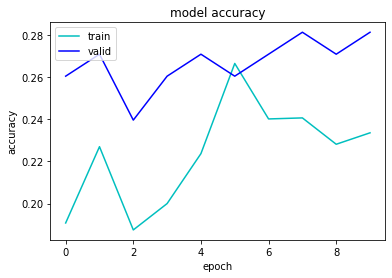

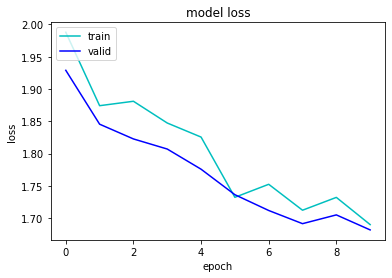

In [ ]:
# summarize history for accuracy
plt.plot(history_vgg_2.history['accuracy'], 'c-')
plt.plot(history_vgg_2.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_vgg_2.history['loss'], 'c-')
plt.plot(history_vgg_2.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

#### InceptionV3

In [88]:
# load model without last layer
model_IV3 = InceptionV3(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the layers to not trainable
for layer in model_IV3.layers:
   layer.trainable = False

# summarize the model
model_IV3.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_IV3.output)
output = Dense(5, activation = 'softmax')(avg)
new_iv3 = tf.keras.Model(inputs = model_IV3.input, outputs = output)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_752 (Conv2D)             (None, 127, 127, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_752 (BatchN (None, 127, 127, 32) 96          conv2d_752[0][0]                 
__________________________________________________________________________________________________
activation_752 (Activation)     (None, 127, 127, 32) 0           batch_normalization_752[0][0]    
_______________________________________________________________________________________

##### Modèle 1: SGD

In [89]:
# Compile model 
new_iv3.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001, momentum = 0.9), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_iv3_sgd= new_iv3.fit(X5_train, validation_data=X5_test, 
                                   epochs= epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/40
5/5 - 6s - loss: 1.9320 - accuracy: 0.1458 - val_loss: 1.9065 - val_accuracy: 0.1406
Epoch 2/40
5/5 - 1s - loss: 1.8494 - accuracy: 0.1813 - val_loss: 1.8046 - val_accuracy: 0.1250
Epoch 3/40
5/5 - 1s - loss: 1.7095 - accuracy: 0.1688 - val_loss: 1.7202 - val_accuracy: 0.1875
Epoch 4/40
5/5 - 1s - loss: 1.6330 - accuracy: 0.2688 - val_loss: 1.5328 - val_accuracy: 0.2969
Epoch 5/40
5/5 - 1s - loss: 1.5511 - accuracy: 0.3625 - val_loss: 1.5073 - val_accuracy: 0.3906
Epoch 6/40
5/5 - 1s - loss: 1.4652 - accuracy: 0.4313 - val_loss: 1.3038 - val_accuracy: 0.5469
Epoch 7/40
5/5 - 1s - loss: 1.2558 - accuracy: 0.5972 - val_loss: 1.2367 - val_accuracy: 0.5781
Epoch 8/40
5/5 - 1s - loss: 1.2009 - accuracy: 0.5938 - val_loss: 1.0514 - val_accuracy: 0.7656
Epoch 9/40
5/5 - 1s - loss: 1.0425 - accuracy: 0.7500 - val_loss: 0.9996 - val_accuracy: 0.7969
Epoch 10/40
5/5 - 1s - loss: 1.0817 - accuracy: 0.6875 - val_loss: 0.9147 - val_accuracy: 0.8281
Epoch 11/40
5/5 - 1s - loss: 0.8928 - a

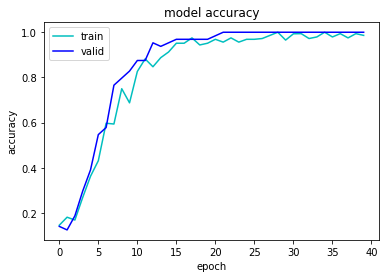

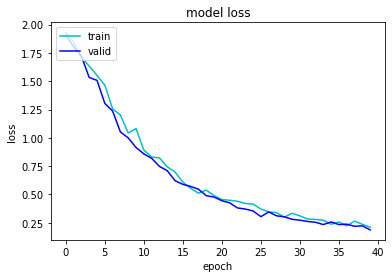

In [90]:
# summarize history for accuracy
plt.plot(history_iv3_sgd.history['accuracy'], 'c-')
plt.plot(history_iv3_sgd.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_iv3_sgd.history['loss'], 'c-')
plt.plot(history_iv3_sgd.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

##### Modèle 2: Adam

In [91]:
# Compile model 
new_iv3.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_iv3= new_iv3.fit(X5_train, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/40
5/5 - 6s - loss: 0.1991 - accuracy: 0.9937 - val_loss: 0.1923 - val_accuracy: 1.0000
Epoch 2/40
5/5 - 1s - loss: 0.1847 - accuracy: 0.9937 - val_loss: 0.1622 - val_accuracy: 1.0000
Epoch 3/40
5/5 - 1s - loss: 0.1652 - accuracy: 0.9937 - val_loss: 0.1415 - val_accuracy: 1.0000
Epoch 4/40
5/5 - 1s - loss: 0.1418 - accuracy: 1.0000 - val_loss: 0.1095 - val_accuracy: 1.0000
Epoch 5/40
5/5 - 1s - loss: 0.1159 - accuracy: 0.9861 - val_loss: 0.1146 - val_accuracy: 1.0000
Epoch 6/40
5/5 - 1s - loss: 0.1311 - accuracy: 0.9812 - val_loss: 0.1166 - val_accuracy: 1.0000
Epoch 7/40
5/5 - 1s - loss: 0.1128 - accuracy: 0.9937 - val_loss: 0.1201 - val_accuracy: 1.0000
Epoch 8/40
5/5 - 1s - loss: 0.0996 - accuracy: 0.9931 - val_loss: 0.0827 - val_accuracy: 1.0000
Epoch 9/40
5/5 - 1s - loss: 0.0709 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 1.0000
Epoch 10/40
5/5 - 1s - loss: 0.0900 - accuracy: 0.9931 - val_loss: 0.0867 - val_accuracy: 1.0000
Epoch 11/40
5/5 - 1s - loss: 0.0720 - a

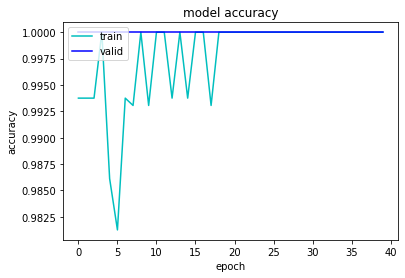

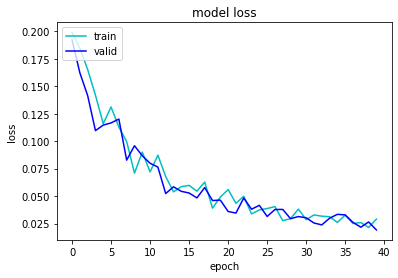

In [92]:
# summarize history for accuracy
plt.plot(history_iv3.history['accuracy'], 'c-')
plt.plot(history_iv3.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_iv3.history['loss'], 'c-')
plt.plot(history_iv3.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### Fine-tuning partiel

In [41]:
epochs = 10

#### ResNet

##### Modèle 1: SGD

###### Nombre de couches non entraînées: 10

In [61]:
# load model without last layer
model_RN_FT = ResNet50(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the last 10 layers to not trainable
for layer in model_RN_FT.layers[:10]:
   layer.trainable = False

# summarize the model
model_RN_FT.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_RN_FT.output)
output = Dense(5, activation = 'softmax')(avg)
new_RN_FT = tf.keras.Model(inputs = model_RN_FT.input, outputs = output)

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [44]:
# Compile model 
new_RN_FT.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_rn_ft= new_RN_FT.fit(X5_train, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/40
10/10 - 9s - loss: 1.7400 - accuracy: 0.2237 - val_loss: 2.1060 - val_accuracy: 0.2083
Epoch 2/40
10/10 - 5s - loss: 1.7181 - accuracy: 0.2344 - val_loss: 1.9174 - val_accuracy: 0.2500
Epoch 3/40
10/10 - 5s - loss: 1.6530 - accuracy: 0.2438 - val_loss: 1.8945 - val_accuracy: 0.2500
Epoch 4/40
10/10 - 5s - loss: 1.6027 - accuracy: 0.2632 - val_loss: 1.8502 - val_accuracy: 0.1771
Epoch 5/40
10/10 - 5s - loss: 1.5859 - accuracy: 0.2829 - val_loss: 1.8557 - val_accuracy: 0.1771
Epoch 6/40
10/10 - 4s - loss: 1.5509 - accuracy: 0.3224 - val_loss: 1.7896 - val_accuracy: 0.1875
Epoch 7/40
10/10 - 4s - loss: 1.4897 - accuracy: 0.3520 - val_loss: 1.7591 - val_accuracy: 0.2396
Epoch 8/40
10/10 - 4s - loss: 1.4864 - accuracy: 0.3487 - val_loss: 1.8272 - val_accuracy: 0.1771
Epoch 9/40
10/10 - 5s - loss: 1.4399 - accuracy: 0.3875 - val_loss: 1.8791 - val_accuracy: 0.2083
Epoch 10/40
10/10 - 4s - loss: 1.4447 - accuracy: 0.3717 - val_loss: 2.0595 - val_accuracy: 0.1979
Epoch 11/40
10/10 -

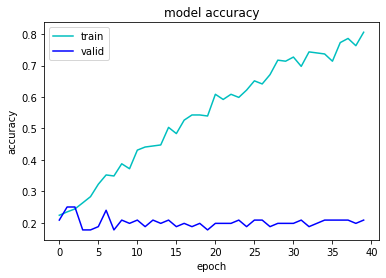

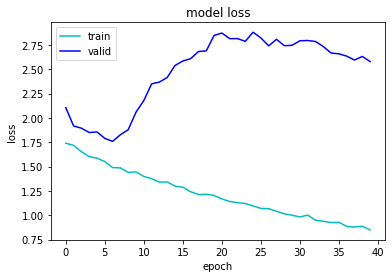

In [45]:
# summarize history for accuracy
plt.plot(history_rn_ft.history['accuracy'], 'c-')
plt.plot(history_rn_ft.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_rn_ft.history['loss'], 'c-')
plt.plot(history_rn_ft.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

###### Nombre de couches non entraînées: 4

In [62]:
# Compile model 
new_RN_FT.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_rn_ft_4= new_RN_FT.fit(X5_train, validation_data=X5_test, 
                                   epochs=10, verbose=2, 
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/10
10/10 - 9s - loss: 1.7677 - accuracy: 0.2438 - val_loss: 1.7469 - val_accuracy: 0.1979
Epoch 2/10
10/10 - 4s - loss: 1.7345 - accuracy: 0.2500 - val_loss: 1.6797 - val_accuracy: 0.1979
Epoch 3/10
10/10 - 4s - loss: 1.7027 - accuracy: 0.2632 - val_loss: 1.7139 - val_accuracy: 0.1979
Epoch 4/10
10/10 - 5s - loss: 1.6743 - accuracy: 0.2656 - val_loss: 1.7672 - val_accuracy: 0.1771
Epoch 5/10
10/10 - 5s - loss: 1.5762 - accuracy: 0.3187 - val_loss: 1.7574 - val_accuracy: 0.2083
Epoch 6/10
10/10 - 4s - loss: 1.5678 - accuracy: 0.3059 - val_loss: 1.7327 - val_accuracy: 0.1979
Epoch 7/10
10/10 - 4s - loss: 1.5330 - accuracy: 0.3191 - val_loss: 1.6998 - val_accuracy: 0.1875
Epoch 8/10
10/10 - 5s - loss: 1.5284 - accuracy: 0.3750 - val_loss: 1.6464 - val_accuracy: 0.1979
Epoch 9/10
10/10 - 5s - loss: 1.4727 - accuracy: 0.3969 - val_loss: 1.6417 - val_accuracy: 0.1875
Epoch 10/10
10/10 - 4s - loss: 1.4738 - accuracy: 0.3783 - val_loss: 1.6458 - val_accuracy: 0.2604
Execution time:  50

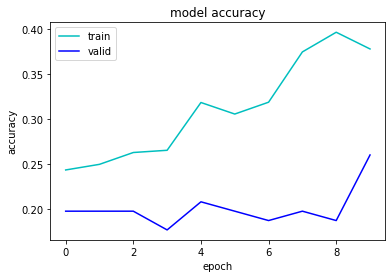

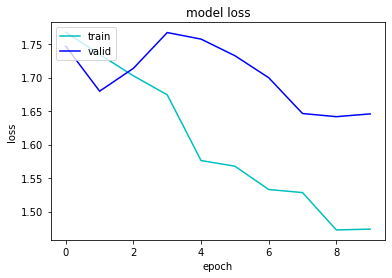

In [63]:
# summarize history for accuracy
plt.plot(history_rn_ft_4.history['accuracy'], 'c-')
plt.plot(history_rn_ft_4.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_rn_ft_4.history['loss'], 'c-')
plt.plot(history_rn_ft_4.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

###### Nombre de couches non entraînées: 17

In [48]:
# load model without last layer
model_RN_FT = ResNet50(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the last 10 layers to not trainable
for layer in model_RN_FT.layers[:17]:
   layer.trainable = False

# summarize the model
model_RN_FT.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_RN_FT.output)
output = Dense(5, activation = 'softmax')(avg)
new_RN_FT = tf.keras.Model(inputs = model_RN_FT.input, outputs = output)

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [49]:
# Compile model 
new_RN_FT.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_rn_ft_17= new_RN_FT.fit(X5_train, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, # epochs change from 10 to 40
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/40
10/10 - 9s - loss: 1.8628 - accuracy: 0.2062 - val_loss: 1.9990 - val_accuracy: 0.2083
Epoch 2/40
10/10 - 4s - loss: 1.7668 - accuracy: 0.2401 - val_loss: 2.0266 - val_accuracy: 0.1979
Epoch 3/40
10/10 - 4s - loss: 1.7357 - accuracy: 0.2171 - val_loss: 1.9261 - val_accuracy: 0.1875
Epoch 4/40
10/10 - 4s - loss: 1.6795 - accuracy: 0.2500 - val_loss: 1.8083 - val_accuracy: 0.1562
Epoch 5/40
10/10 - 4s - loss: 1.6359 - accuracy: 0.2697 - val_loss: 1.7475 - val_accuracy: 0.1875
Epoch 6/40
10/10 - 4s - loss: 1.5958 - accuracy: 0.3257 - val_loss: 1.7329 - val_accuracy: 0.2188
Epoch 7/40
10/10 - 4s - loss: 1.5632 - accuracy: 0.2993 - val_loss: 1.7690 - val_accuracy: 0.1771
Epoch 8/40
10/10 - 4s - loss: 1.5436 - accuracy: 0.3289 - val_loss: 1.7776 - val_accuracy: 0.2083
Epoch 9/40
10/10 - 4s - loss: 1.4977 - accuracy: 0.3520 - val_loss: 1.8473 - val_accuracy: 0.1979
Epoch 10/40
10/10 - 4s - loss: 1.4609 - accuracy: 0.3914 - val_loss: 1.8061 - val_accuracy: 0.2083
Epoch 11/40
10/10 -

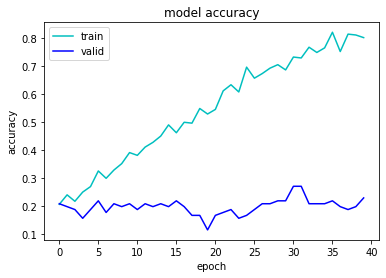

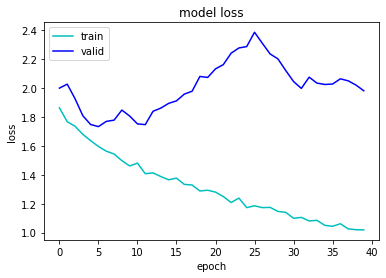

In [50]:
# summarize history for accuracy
plt.plot(history_rn_ft_17.history['accuracy'], 'c-')
plt.plot(history_rn_ft_17.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_rn_ft_17.history['loss'], 'c-')
plt.plot(history_rn_ft_17.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

##### Modèle 2: Adam

###### Nombre de couches non entraînées: 10

In [51]:
# load model without last layer
model_RN_FT = ResNet50(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the last 10 layers to not trainable
for layer in model_RN_FT.layers[:10]:
   layer.trainable = False

# summarize the model
model_RN_FT.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_RN_FT.output)
output = Dense(5, activation = 'softmax')(avg)
new_RN_FT = tf.keras.Model(inputs = model_RN_FT.input, outputs = output)

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [52]:
# Compile model 
new_RN_FT.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_rn_ft_10= new_RN_FT.fit(X5_train, validation_data=X5_test, 
                                   epochs=epochs, verbose=2, # epochs change from 10 to 20
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/40
10/10 - 10s - loss: 0.9273 - accuracy: 0.6645 - val_loss: 2.0223 - val_accuracy: 0.1771
Epoch 2/40
10/10 - 4s - loss: 0.0697 - accuracy: 0.9868 - val_loss: 2.2004 - val_accuracy: 0.2083
Epoch 3/40
10/10 - 5s - loss: 0.0327 - accuracy: 0.9906 - val_loss: 2.2549 - val_accuracy: 0.1875
Epoch 4/40
10/10 - 5s - loss: 0.0101 - accuracy: 0.9969 - val_loss: 2.1352 - val_accuracy: 0.1875
Epoch 5/40
10/10 - 5s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.0221 - val_accuracy: 0.1979
Epoch 6/40
10/10 - 5s - loss: 0.0182 - accuracy: 0.9969 - val_loss: 1.8646 - val_accuracy: 0.1875
Epoch 7/40
10/10 - 4s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.7014 - val_accuracy: 0.1979
Epoch 8/40
10/10 - 4s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.6340 - val_accuracy: 0.2083
Epoch 9/40
10/10 - 4s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.6222 - val_accuracy: 0.2188
Epoch 10/40
10/10 - 4s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.6221 - val_accuracy: 0.2188
Epoch 11/40
10/10 

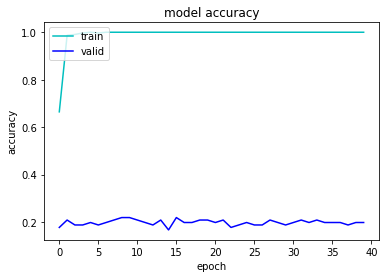

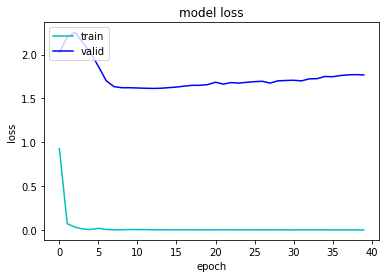

In [53]:
# summarize history for accuracy
plt.plot(history_rn_ft_10.history['accuracy'], 'c-')
plt.plot(history_rn_ft_10.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_rn_ft_10.history['loss'], 'c-')
plt.plot(history_rn_ft_10.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

#### VGG-16

##### Modèle 1: SGD

###### Nombre de couches non entraînées: 4

In [42]:
# load model without last layer
model_VGG_FT = VGG16(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the last 10 layers to not trainable
for layer in model_VGG_FT.layers[:4]:
   layer.trainable = False

# summarize the model
model_VGG_FT.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_VGG_FT.output)
output = Dense(5, activation = 'softmax')(avg)
new_VGG_FT = tf.keras.Model(inputs = model_VGG_FT.input, outputs = output)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [66]:
# Compile model 
new_VGG_FT.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001, momentum=0.9), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_vgg_ft_4= new_VGG_FT.fit(X5_train, validation_data=X5_test, 
                                   epochs=10, verbose=2, # epochs change from 10 to 40
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/10
10/10 - 6s - loss: 1.6984 - accuracy: 0.1776 - val_loss: 1.6447 - val_accuracy: 0.2083
Epoch 2/10
10/10 - 5s - loss: 1.6212 - accuracy: 0.2303 - val_loss: 1.6209 - val_accuracy: 0.2292
Epoch 3/10
10/10 - 5s - loss: 1.6146 - accuracy: 0.2281 - val_loss: 1.5873 - val_accuracy: 0.2708
Epoch 4/10
10/10 - 5s - loss: 1.5873 - accuracy: 0.3026 - val_loss: 1.5733 - val_accuracy: 0.2917
Epoch 5/10
10/10 - 5s - loss: 1.5665 - accuracy: 0.3094 - val_loss: 1.5558 - val_accuracy: 0.3438
Epoch 6/10
10/10 - 5s - loss: 1.5467 - accuracy: 0.3191 - val_loss: 1.5418 - val_accuracy: 0.3750
Epoch 7/10
10/10 - 5s - loss: 1.5225 - accuracy: 0.3618 - val_loss: 1.5113 - val_accuracy: 0.4479
Epoch 8/10
10/10 - 5s - loss: 1.4980 - accuracy: 0.4539 - val_loss: 1.4902 - val_accuracy: 0.4792
Epoch 9/10
10/10 - 5s - loss: 1.4667 - accuracy: 0.5132 - val_loss: 1.4570 - val_accuracy: 0.5833
Epoch 10/10
10/10 - 4s - loss: 1.4306 - accuracy: 0.5395 - val_loss: 1.4174 - val_accuracy: 0.6042
Execution time:  47

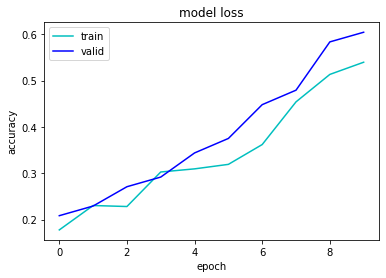

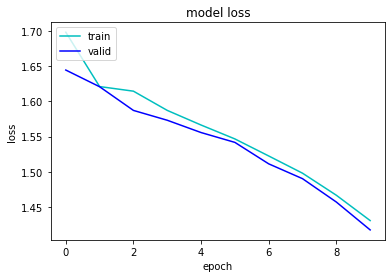

In [67]:
# summarize history for accuracy
plt.plot(history_vgg_ft_4.history['accuracy'], 'c-')
plt.plot(history_vgg_ft_4.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_vgg_ft_4.history['loss'], 'c-')
plt.plot(history_vgg_ft_4.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

###### Nombre de couches non entraînées: 8

In [68]:
# load model without last layer
model_VGG_FT = VGG16(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the last 8 layers to not trainable
for layer in model_VGG_FT.layers[:8]:
   layer.trainable = False

# summarize the model
model_VGG_FT.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_VGG_FT.output)
output = Dense(5, activation = 'softmax')(avg)
new_VGG_FT = tf.keras.Model(inputs = model_VGG_FT.input, outputs = output)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [69]:
# Compile model 
new_VGG_FT.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001, momentum=0.9), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_vgg_ft_8= new_VGG_FT.fit(X5_train, validation_data=X5_test, 
                                   epochs=10, verbose=2, # epochs change from 10 to 40
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/10
10/10 - 4s - loss: 1.6698 - accuracy: 0.2138 - val_loss: 1.6669 - val_accuracy: 0.1875
Epoch 2/10
10/10 - 3s - loss: 1.6042 - accuracy: 0.2697 - val_loss: 1.5868 - val_accuracy: 0.3125
Epoch 3/10
10/10 - 4s - loss: 1.5616 - accuracy: 0.3063 - val_loss: 1.5568 - val_accuracy: 0.3229
Epoch 4/10
10/10 - 4s - loss: 1.5516 - accuracy: 0.3454 - val_loss: 1.5433 - val_accuracy: 0.3646
Epoch 5/10
10/10 - 4s - loss: 1.5243 - accuracy: 0.3980 - val_loss: 1.5165 - val_accuracy: 0.4583
Epoch 6/10
10/10 - 4s - loss: 1.4958 - accuracy: 0.3849 - val_loss: 1.4994 - val_accuracy: 0.4167
Epoch 7/10
10/10 - 4s - loss: 1.4791 - accuracy: 0.4178 - val_loss: 1.4779 - val_accuracy: 0.4896
Epoch 8/10
10/10 - 4s - loss: 1.4548 - accuracy: 0.4563 - val_loss: 1.4558 - val_accuracy: 0.4688
Epoch 9/10
10/10 - 4s - loss: 1.4330 - accuracy: 0.4737 - val_loss: 1.4197 - val_accuracy: 0.4583
Epoch 10/10
10/10 - 4s - loss: 1.3914 - accuracy: 0.5099 - val_loss: 1.3783 - val_accuracy: 0.5000
Execution time:  37

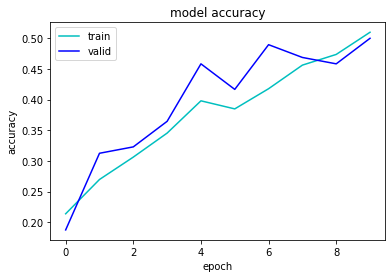

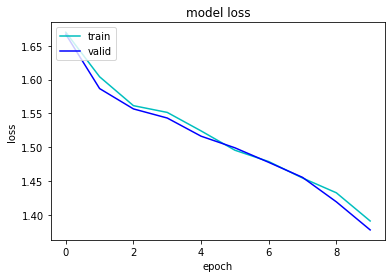

In [70]:
# summarize history for accuracy
plt.plot(history_vgg_ft_8.history['accuracy'], 'c-')
plt.plot(history_vgg_ft_8.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_vgg_ft_8.history['loss'], 'c-')
plt.plot(history_vgg_ft_8.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

##### Modèle 2: Adam

###### Nombre de couches non entraînées: 4

In [71]:
# load model without last layer
model_VGG_FT = VGG16(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the last 4 layers to not trainable
for layer in model_VGG_FT.layers[:4]:
   layer.trainable = False

# summarize the model
model_VGG_FT.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_VGG_FT.output)
output = Dense(5, activation = 'softmax')(avg)
new_VGG_FT = tf.keras.Model(inputs = model_VGG_FT.input, outputs = output)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [72]:
# Compile model 
new_VGG_FT.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_vgg_ft_4= new_VGG_FT.fit(X5_train, validation_data=X5_test, 
                                   epochs=10, verbose=2, # epochs change from 10 to 40
                                   #callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/10
10/10 - 6s - loss: 1.5739 - accuracy: 0.2844 - val_loss: 1.2473 - val_accuracy: 0.4271
Epoch 2/10
10/10 - 5s - loss: 1.0687 - accuracy: 0.5132 - val_loss: 0.9474 - val_accuracy: 0.5938
Epoch 3/10
10/10 - 5s - loss: 0.6948 - accuracy: 0.7500 - val_loss: 0.5850 - val_accuracy: 0.8333
Epoch 4/10
10/10 - 4s - loss: 0.7910 - accuracy: 0.7467 - val_loss: 0.6361 - val_accuracy: 0.7500
Epoch 5/10
10/10 - 5s - loss: 0.4858 - accuracy: 0.8421 - val_loss: 0.4763 - val_accuracy: 0.8542
Epoch 6/10
10/10 - 5s - loss: 0.3618 - accuracy: 0.8406 - val_loss: 0.9041 - val_accuracy: 0.7396
Epoch 7/10
10/10 - 5s - loss: 0.2651 - accuracy: 0.9309 - val_loss: 0.5062 - val_accuracy: 0.8542
Epoch 8/10
10/10 - 5s - loss: 0.2484 - accuracy: 0.9031 - val_loss: 1.2132 - val_accuracy: 0.6146
Epoch 9/10
10/10 - 4s - loss: 0.2834 - accuracy: 0.9243 - val_loss: 0.5654 - val_accuracy: 0.7604
Epoch 10/10
10/10 - 4s - loss: 0.1345 - accuracy: 0.9737 - val_loss: 0.6784 - val_accuracy: 0.8125
Execution time:  46

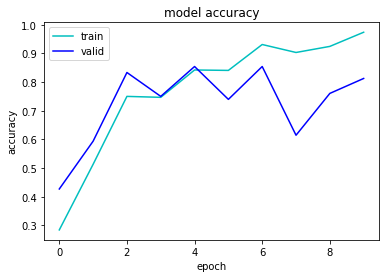

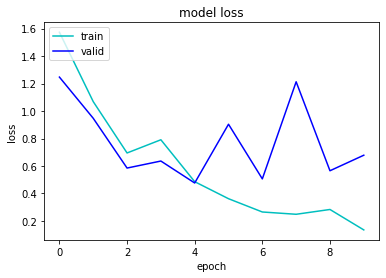

In [73]:
# summarize history for accuracy
plt.plot(history_vgg_ft_4.history['accuracy'], 'c-')
plt.plot(history_vgg_ft_4.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_vgg_ft_4.history['loss'], 'c-')
plt.plot(history_vgg_ft_4.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

#### InceptionV3

##### Modèle: SGD

###### Nombre de couches non entraînées: 3

In [99]:
# load model without last layer
model_IV3 = InceptionV3(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the last 4 layers to not trainable
for layer in model_IV3.layers[:3]:
   layer.trainable = False

# summarize the model
model_IV3.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_IV3.output)
output = Dense(5, activation = 'softmax')(avg)
new_IV3 = tf.keras.Model(inputs = model_IV3.input, outputs = output)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_940 (Conv2D)             (None, 127, 127, 32) 864         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_940 (BatchN (None, 127, 127, 32) 96          conv2d_940[0][0]                 
__________________________________________________________________________________________________
activation_940 (Activation)     (None, 127, 127, 32) 0           batch_normalization_940[0][0]    
_______________________________________________________________________________________

In [108]:
# Compile model 
new_IV3.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001, momentum=0.9), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_iv3_ft_3= new_IV3.fit(X5_train, validation_data=X5_test, 
                                   epochs=20, verbose=2, 
                                   #callbacks = [early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/20
5/5 - 8s - loss: 0.0682 - accuracy: 0.9722 - val_loss: 0.2052 - val_accuracy: 0.9219
Epoch 2/20
5/5 - 2s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.2541 - val_accuracy: 0.9375
Epoch 3/20
5/5 - 2s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9531
Epoch 4/20
5/5 - 2s - loss: 0.0080 - accuracy: 0.9937 - val_loss: 0.1833 - val_accuracy: 0.9375
Epoch 5/20
5/5 - 2s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9688
Epoch 6/20
5/5 - 2s - loss: 0.0442 - accuracy: 0.9812 - val_loss: 0.1053 - val_accuracy: 0.9375
Epoch 7/20
5/5 - 2s - loss: 0.0568 - accuracy: 0.9875 - val_loss: 0.0666 - val_accuracy: 0.9688
Epoch 8/20
5/5 - 2s - loss: 0.0312 - accuracy: 0.9812 - val_loss: 0.1158 - val_accuracy: 0.9531
Epoch 9/20
5/5 - 2s - loss: 0.0124 - accuracy: 0.9937 - val_loss: 0.2487 - val_accuracy: 0.9219
Epoch 10/20
5/5 - 2s - loss: 0.0125 - accuracy: 0.9937 - val_loss: 0.0739 - val_accuracy: 0.9688
Epoch 11/20
5/5 - 2s - loss: 0.0156 - a

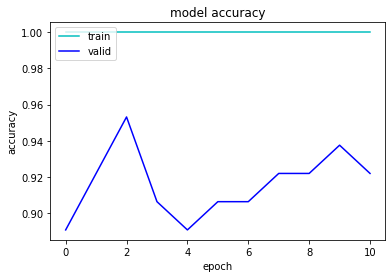

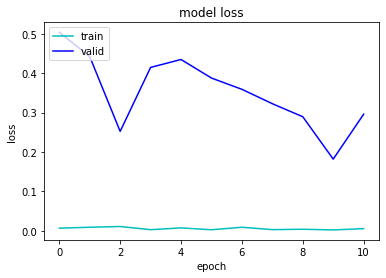

In [106]:
# summarize history for accuracy
plt.plot(history_iv3_ft_3.history['accuracy'], 'c-')
plt.plot(history_iv3_ft_3.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_iv3_ft_3.history['loss'], 'c-')
plt.plot(history_iv3_ft_3.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

##### Modèle 2: Adam

###### Nombre de couches non entraînées: 3

In [107]:
# Compile model 
new_IV3.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001),
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_iv3_ft_3_adam= new_IV3.fit(X5_train, validation_data=X5_test, 
                                   epochs=20, verbose=2, 
                                   #callbacks = [early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/20
5/5 - 9s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2193 - val_accuracy: 0.9219
Epoch 2/20
5/5 - 2s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3723 - val_accuracy: 0.9219
Epoch 3/20
5/5 - 2s - loss: 0.0693 - accuracy: 0.9792 - val_loss: 0.2299 - val_accuracy: 0.9375
Epoch 4/20
5/5 - 2s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3117 - val_accuracy: 0.9219
Epoch 5/20
5/5 - 2s - loss: 0.0656 - accuracy: 0.9722 - val_loss: 0.3126 - val_accuracy: 0.9375
Epoch 6/20
5/5 - 2s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2918 - val_accuracy: 0.9219
Epoch 7/20
5/5 - 2s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2650 - val_accuracy: 0.9219
Epoch 8/20
5/5 - 2s - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.2872 - val_accuracy: 0.9375
Epoch 9/20
5/5 - 2s - loss: 8.9579e-04 - accuracy: 1.0000 - val_loss: 0.2127 - val_accuracy: 0.9375
Epoch 10/20
5/5 - 2s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2338 - val_accuracy: 0.9375
Epoch 11/20
5/5 - 2s - loss: 0.0154

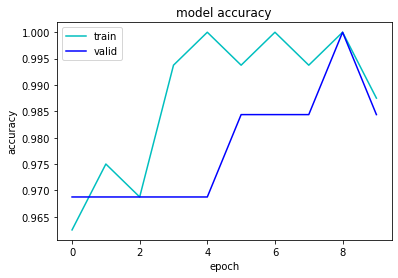

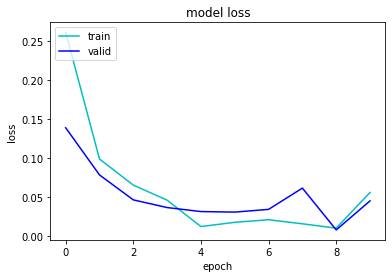

In [103]:
# summarize history for accuracy
plt.plot(history_iv3_ft_3_adam.history['accuracy'], 'c-')
plt.plot(history_iv3_ft_3_adam.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_iv3_ft_3_adam.history['loss'], 'c-')
plt.plot(history_iv3_ft_3_adam.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Comparaison des meilleurs modèles

Test avec 120 classes des 4 meilleurs modèles avec et sans augmentation pour définir le meilleur modèle

In [200]:
epochs = 50
batch_size = 40

## Sans augmentation

### InceptionV3 - SGD - Extraction de features

In [180]:
# load model without last layer
model_IV3 = InceptionV3(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the layers to not trainable
for layer in model_IV3.layers:
   layer.trainable = False

# summarize the model
model_IV3.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_IV3.output)
output = Dense(120, activation = 'softmax')(avg) # change to 120 to match the number of classes
new_iv3 = tf.keras.Model(inputs = model_IV3.input, outputs = output)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3008 (Conv2D)            (None, 127, 127, 32) 864         input_34[0][0]                   
__________________________________________________________________________________________________
batch_normalization_3008 (Batch (None, 127, 127, 32) 96          conv2d_3008[0][0]                
__________________________________________________________________________________________________
activation_3008 (Activation)    (None, 127, 127, 32) 0           batch_normalization_3008[0][0]   
_______________________________________________________________________________________

In [181]:
# Compile model 
new_iv3.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001, momentum = 0.9), 
                metrics=["accuracy"])


In [182]:
# Fit model on generator (5 classes)
start = time.time()
history_best_iv3_sgd= new_iv3.fit(train_datagen, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2, 
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/50
5/5 - 6s - loss: 5.0547 - accuracy: 0.0125 - val_loss: 4.8951 - val_accuracy: 0.0000e+00
Epoch 2/50
5/5 - 1s - loss: 5.0213 - accuracy: 0.0125 - val_loss: 5.0715 - val_accuracy: 0.0156
Epoch 3/50
5/5 - 1s - loss: 5.1309 - accuracy: 0.0063 - val_loss: 5.1714 - val_accuracy: 0.0156
Epoch 4/50
5/5 - 1s - loss: 5.0552 - accuracy: 0.0063 - val_loss: 5.0477 - val_accuracy: 0.0156
Epoch 5/50
5/5 - 1s - loss: 5.0802 - accuracy: 0.0000e+00 - val_loss: 4.9831 - val_accuracy: 0.0000e+00
Epoch 6/50
5/5 - 1s - loss: 5.0330 - accuracy: 0.0125 - val_loss: 5.0506 - val_accuracy: 0.0156
Epoch 7/50
5/5 - 1s - loss: 4.9983 - accuracy: 0.0125 - val_loss: 4.9933 - val_accuracy: 0.0156
Epoch 8/50
5/5 - 1s - loss: 4.8532 - accuracy: 0.0312 - val_loss: 4.8881 - val_accuracy: 0.0156
Epoch 9/50
5/5 - 1s - loss: 5.0566 - accuracy: 0.0125 - val_loss: 4.8981 - val_accuracy: 0.0000e+00
Epoch 10/50
5/5 - 1s - loss: 4.9651 - accuracy: 0.0063 - val_loss: 4.9314 - val_accuracy: 0.0000e+00
Execution time:  14

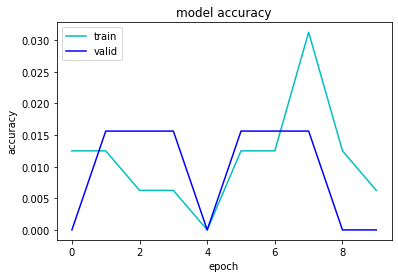

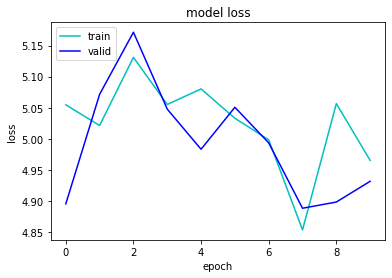

In [183]:
# summarize history for accuracy
plt.plot(history_best_iv3_sgd.history['accuracy'], 'c-')
plt.plot(history_best_iv3_sgd.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_best_iv3_sgd.history['loss'], 'c-')
plt.plot(history_best_iv3_sgd.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### InceptionV3 - Adam - Extraction de features

In [163]:
# load model without last layer
model_IV3 = InceptionV3(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the layers to not trainable
for layer in model_IV3.layers:
   layer.trainable = False

# summarize the model
model_IV3.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_IV3.output)
output = Dense(120, activation = 'softmax')(avg) # change to 120 to match the number of classes
new_iv3 = tf.keras.Model(inputs = model_IV3.input, outputs = output)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2538 (Conv2D)            (None, 127, 127, 32) 864         input_29[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2538 (Batch (None, 127, 127, 32) 96          conv2d_2538[0][0]                
__________________________________________________________________________________________________
activation_2538 (Activation)    (None, 127, 127, 32) 0           batch_normalization_2538[0][0]   
_______________________________________________________________________________________

In [164]:
# Compile model 
new_iv3.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_best_iv3_adam= new_iv3.fit(train_datagen, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2, 
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/60
10/10 - 7s - loss: 5.0683 - accuracy: 0.0156 - val_loss: 5.0119 - val_accuracy: 0.0417
Epoch 2/60
10/10 - 2s - loss: 4.9882 - accuracy: 0.0219 - val_loss: 4.8191 - val_accuracy: 0.0312
Epoch 3/60
10/10 - 2s - loss: 4.7872 - accuracy: 0.0312 - val_loss: 4.7692 - val_accuracy: 0.0104
Epoch 4/60
10/10 - 2s - loss: 4.5226 - accuracy: 0.0406 - val_loss: 4.4153 - val_accuracy: 0.0312
Epoch 5/60
10/10 - 2s - loss: 4.4541 - accuracy: 0.0594 - val_loss: 4.4278 - val_accuracy: 0.0625
Epoch 6/60
10/10 - 2s - loss: 4.2318 - accuracy: 0.1063 - val_loss: 4.1826 - val_accuracy: 0.0938
Epoch 7/60
10/10 - 2s - loss: 4.1690 - accuracy: 0.1063 - val_loss: 3.9545 - val_accuracy: 0.1979
Epoch 8/60
10/10 - 2s - loss: 4.0192 - accuracy: 0.1500 - val_loss: 3.9649 - val_accuracy: 0.1875
Epoch 9/60
10/10 - 2s - loss: 3.8927 - accuracy: 0.2281 - val_loss: 3.7726 - val_accuracy: 0.1875
Epoch 10/60
10/10 - 2s - loss: 3.7057 - accuracy: 0.3094 - val_loss: 3.7402 - val_accuracy: 0.3125
Epoch 11/60
10/10 -

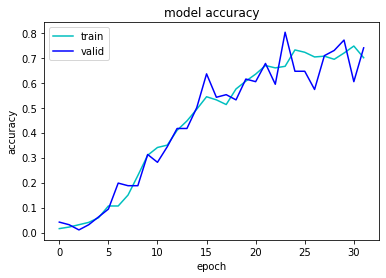

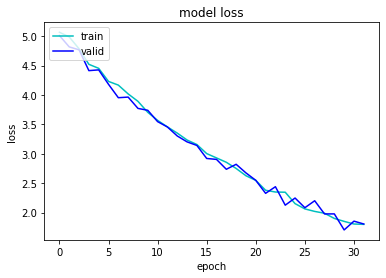

In [165]:
# summarize history for accuracy
plt.plot(history_best_iv3_adam.history['accuracy'], 'c-')
plt.plot(history_best_iv3_adam.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_best_iv3_adam.history['loss'], 'c-')
plt.plot(history_best_iv3_adam.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### InceptionV3 - 3 couches NE - Fine tuning partiel

In [166]:
# load model without last layer
model_IV3 = InceptionV3(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the last 4 layers to not trainable
for layer in model_IV3.layers[:3]:
   layer.trainable = False

# summarize the model
model_IV3.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_IV3.output)
output = Dense(120, activation = 'softmax')(avg) # change to 120 to match the number of classes
new_IV3 = tf.keras.Model(inputs = model_IV3.input, outputs = output)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2632 (Conv2D)            (None, 127, 127, 32) 864         input_30[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2632 (Batch (None, 127, 127, 32) 96          conv2d_2632[0][0]                
__________________________________________________________________________________________________
activation_2632 (Activation)    (None, 127, 127, 32) 0           batch_normalization_2632[0][0]   
_______________________________________________________________________________________

In [167]:
# Compile model 
new_IV3.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001, momentum=0.9), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_best_iv3= new_IV3.fit(train_datagen, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2, 
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/60
10/10 - 10s - loss: 4.9072 - accuracy: 0.0125 - val_loss: 4.8932 - val_accuracy: 0.0000e+00
Epoch 2/60
10/10 - 4s - loss: 4.9088 - accuracy: 0.0250 - val_loss: 5.0917 - val_accuracy: 0.0312
Epoch 3/60
10/10 - 4s - loss: 4.9605 - accuracy: 0.0125 - val_loss: 4.9599 - val_accuracy: 0.0000e+00
Epoch 4/60
10/10 - 4s - loss: 4.9118 - accuracy: 0.0094 - val_loss: 4.9574 - val_accuracy: 0.0000e+00
Epoch 5/60
10/10 - 4s - loss: 4.8952 - accuracy: 0.0063 - val_loss: 4.8120 - val_accuracy: 0.0104
Epoch 6/60
10/10 - 4s - loss: 4.8500 - accuracy: 0.0125 - val_loss: 4.8370 - val_accuracy: 0.0104
Epoch 7/60
10/10 - 4s - loss: 4.8703 - accuracy: 0.0031 - val_loss: 4.8162 - val_accuracy: 0.0104
Epoch 8/60
10/10 - 4s - loss: 4.8278 - accuracy: 0.0094 - val_loss: 4.7600 - val_accuracy: 0.0312
Epoch 9/60
10/10 - 4s - loss: 4.8071 - accuracy: 0.0125 - val_loss: 4.8203 - val_accuracy: 0.0000e+00
Epoch 10/60
10/10 - 4s - loss: 4.7961 - accuracy: 0.0219 - val_loss: 4.8409 - val_accuracy: 0.0312
Ex

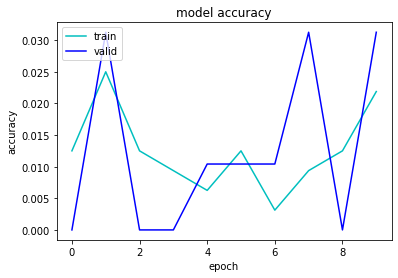

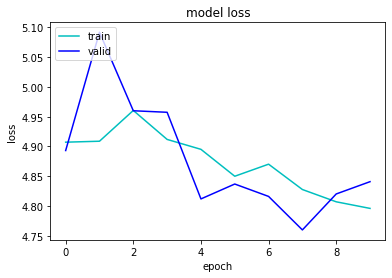

In [168]:
# summarize history for accuracy
plt.plot(history_best_iv3.history['accuracy'], 'c-')
plt.plot(history_best_iv3.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_best_iv3.history['loss'], 'c-')
plt.plot(history_best_iv3.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Avec augmentation

### InceptionV3 - SGD - Extraction de features

In [169]:
# load model without last layer
model_IV3 = InceptionV3(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the layers to not trainable
for layer in model_IV3.layers:
   layer.trainable = False

# summarize the model
model_IV3.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_IV3.output)
output = Dense(120, activation = 'softmax')(avg) # change to 120 to match the number of classes
new_iv3 = tf.keras.Model(inputs = model_IV3.input, outputs = output)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2726 (Conv2D)            (None, 127, 127, 32) 864         input_31[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2726 (Batch (None, 127, 127, 32) 96          conv2d_2726[0][0]                
__________________________________________________________________________________________________
activation_2726 (Activation)    (None, 127, 127, 32) 0           batch_normalization_2726[0][0]   
_______________________________________________________________________________________

In [170]:
# Compile model 
new_iv3.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001, momentum = 0.9), 
                metrics=["accuracy"])


In [171]:
# Fit model on generator (5 classes)
start = time.time()
history_best_iv3_sgd= new_iv3.fit(train_datagen_augm, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2,
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/60
10/10 - 8s - loss: 5.1334 - accuracy: 0.0094 - val_loss: 5.0818 - val_accuracy: 0.0000e+00
Epoch 2/60
10/10 - 2s - loss: 5.0297 - accuracy: 0.0094 - val_loss: 5.0354 - val_accuracy: 0.0208
Epoch 3/60
10/10 - 2s - loss: 5.0101 - accuracy: 0.0156 - val_loss: 4.9385 - val_accuracy: 0.0104
Epoch 4/60
10/10 - 2s - loss: 5.0452 - accuracy: 0.0063 - val_loss: 5.0803 - val_accuracy: 0.0000e+00
Epoch 5/60
10/10 - 2s - loss: 5.0025 - accuracy: 0.0156 - val_loss: 5.1227 - val_accuracy: 0.0000e+00
Epoch 6/60
10/10 - 2s - loss: 4.9864 - accuracy: 0.0094 - val_loss: 5.0250 - val_accuracy: 0.0000e+00
Epoch 7/60
10/10 - 2s - loss: 5.0122 - accuracy: 0.0125 - val_loss: 5.0667 - val_accuracy: 0.0000e+00
Epoch 8/60
10/10 - 2s - loss: 4.9052 - accuracy: 0.0094 - val_loss: 4.7919 - val_accuracy: 0.0208
Epoch 9/60
10/10 - 2s - loss: 4.8977 - accuracy: 0.0156 - val_loss: 4.9852 - val_accuracy: 0.0104
Epoch 10/60
10/10 - 2s - loss: 4.8686 - accuracy: 0.0063 - val_loss: 4.9526 - val_accuracy: 0.0312

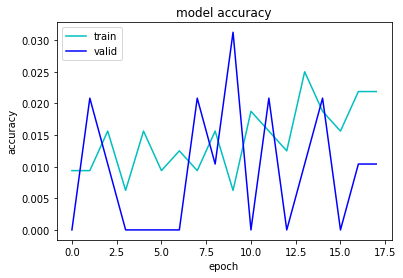

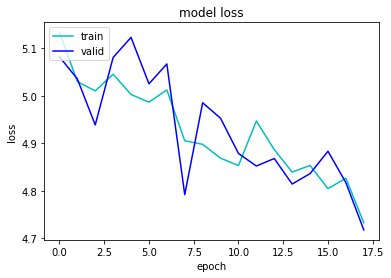

In [172]:
# summarize history for accuracy
plt.plot(history_best_iv3_sgd.history['accuracy'], 'c-')
plt.plot(history_best_iv3_sgd.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_best_iv3_sgd.history['loss'], 'c-')
plt.plot(history_best_iv3_sgd.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### InceptionV3 - Adam - Extraction de features

In [173]:
# load model without last layer
model_IV3 = InceptionV3(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the layers to not trainable
for layer in model_IV3.layers:
   layer.trainable = False

# summarize the model
model_IV3.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_IV3.output)
output = Dense(120, activation = 'softmax')(avg) # change to 120 to match the number of classes
new_iv3 = tf.keras.Model(inputs = model_IV3.input, outputs = output)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2820 (Conv2D)            (None, 127, 127, 32) 864         input_32[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2820 (Batch (None, 127, 127, 32) 96          conv2d_2820[0][0]                
__________________________________________________________________________________________________
activation_2820 (Activation)    (None, 127, 127, 32) 0           batch_normalization_2820[0][0]   
_______________________________________________________________________________________

In [174]:
# Compile model 
new_iv3.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_best_iv3_adam= new_iv3.fit(train_datagen_augm, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2,
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/60
10/10 - 7s - loss: 5.0062 - accuracy: 0.0188 - val_loss: 4.8530 - val_accuracy: 0.0208
Epoch 2/60
10/10 - 2s - loss: 4.8472 - accuracy: 0.0281 - val_loss: 4.6954 - val_accuracy: 0.0208
Epoch 3/60
10/10 - 2s - loss: 4.6573 - accuracy: 0.0370 - val_loss: 4.6071 - val_accuracy: 0.0312
Epoch 4/60
10/10 - 2s - loss: 4.4808 - accuracy: 0.0531 - val_loss: 4.5632 - val_accuracy: 0.0208
Epoch 5/60
10/10 - 2s - loss: 4.3942 - accuracy: 0.0812 - val_loss: 4.2815 - val_accuracy: 0.0833
Epoch 6/60
10/10 - 2s - loss: 4.2555 - accuracy: 0.1094 - val_loss: 4.1390 - val_accuracy: 0.1771
Epoch 7/60
10/10 - 2s - loss: 4.0556 - accuracy: 0.1813 - val_loss: 4.0440 - val_accuracy: 0.2188
Epoch 8/60
10/10 - 2s - loss: 4.0143 - accuracy: 0.1750 - val_loss: 4.0068 - val_accuracy: 0.1354
Epoch 9/60
10/10 - 2s - loss: 3.8341 - accuracy: 0.2031 - val_loss: 3.6837 - val_accuracy: 0.2708
Epoch 10/60
10/10 - 2s - loss: 3.6954 - accuracy: 0.2812 - val_loss: 3.6519 - val_accuracy: 0.3021
Epoch 11/60
10/10 -

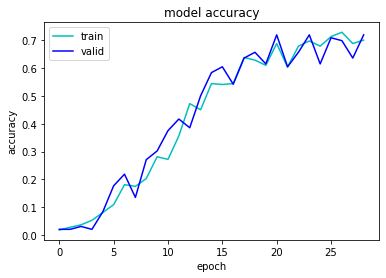

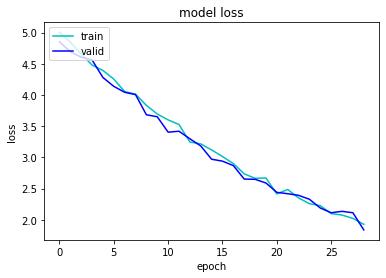

In [175]:
# summarize history for accuracy
plt.plot(history_best_iv3_adam.history['accuracy'], 'c-')
plt.plot(history_best_iv3_adam.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_best_iv3_adam.history['loss'], 'c-')
plt.plot(history_best_iv3_adam.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### InceptionV3 - 3 couches NE - Fine tuning partiel

In [184]:
# load model without last layer
model_IV3 = InceptionV3(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the last 4 layers to not trainable
for layer in model_IV3.layers[:3]:
   layer.trainable = False

# summarize the model
model_IV3.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_IV3.output)
output = Dense(120, activation = 'softmax')(avg) # change to 120 to match the number of classes
new_IV3 = tf.keras.Model(inputs = model_IV3.input, outputs = output)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3102 (Conv2D)            (None, 127, 127, 32) 864         input_35[0][0]                   
__________________________________________________________________________________________________
batch_normalization_3102 (Batch (None, 127, 127, 32) 96          conv2d_3102[0][0]                
__________________________________________________________________________________________________
activation_3102 (Activation)    (None, 127, 127, 32) 0           batch_normalization_3102[0][0]   
_______________________________________________________________________________________

In [185]:
# Compile model 
new_IV3.compile(loss="categorical_crossentropy", 
                optimizer=SGD(learning_rate=0.0001, momentum=0.9), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_best_iv3= new_IV3.fit(train_datagen_augm, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2,
                                   callbacks = [checkpoint_cb, early_stopping_cd],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/50
5/5 - 8s - loss: 4.9334 - accuracy: 0.0063 - val_loss: 5.1740 - val_accuracy: 0.0000e+00
Epoch 2/50
5/5 - 2s - loss: 4.9038 - accuracy: 0.0125 - val_loss: 5.0904 - val_accuracy: 0.0312
Epoch 3/50
5/5 - 2s - loss: 4.9820 - accuracy: 0.0000e+00 - val_loss: 5.1363 - val_accuracy: 0.0156
Epoch 4/50
5/5 - 2s - loss: 5.0279 - accuracy: 0.0000e+00 - val_loss: 5.0919 - val_accuracy: 0.0000e+00
Epoch 5/50
5/5 - 2s - loss: 4.9095 - accuracy: 0.0063 - val_loss: 5.0295 - val_accuracy: 0.0000e+00
Epoch 6/50
5/5 - 2s - loss: 4.9134 - accuracy: 0.0000e+00 - val_loss: 5.0806 - val_accuracy: 0.0156
Epoch 7/50
5/5 - 2s - loss: 4.8583 - accuracy: 0.0000e+00 - val_loss: 4.8814 - val_accuracy: 0.0156
Epoch 8/50
5/5 - 2s - loss: 4.9726 - accuracy: 0.0000e+00 - val_loss: 5.0584 - val_accuracy: 0.0000e+00
Epoch 9/50
5/5 - 2s - loss: 4.8867 - accuracy: 0.0125 - val_loss: 4.8697 - val_accuracy: 0.0312
Epoch 10/50
5/5 - 2s - loss: 4.8638 - accuracy: 0.0188 - val_loss: 4.9164 - val_accuracy: 0.0156
Exe

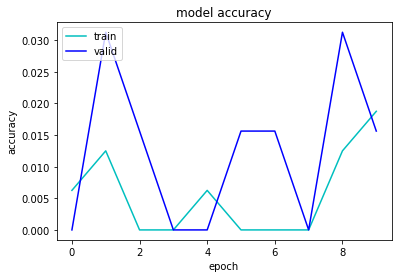

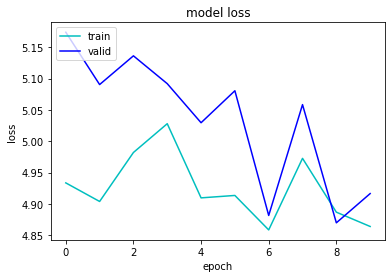

In [186]:
# summarize history for accuracy
plt.plot(history_best_iv3.history['accuracy'], 'c-')
plt.plot(history_best_iv3.history['val_accuracy'], 'b-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_best_iv3.history['loss'], 'c-')
plt.plot(history_best_iv3.history['val_loss'], 'b-')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Meilleur modèle avec les données tests

In [201]:
checkpoint_cb_best = ModelCheckpoint('saved_models/best_model.h5', save_best_only=True)
early_stopping_cd_best = EarlyStopping(monitor = 'val_accuracy', patience=8)


In [202]:
# load model without last layer
model_IV3 = InceptionV3(include_top=False, input_shape= (256,256,3), weights= 'imagenet')

# Set up the layers to not trainable
for layer in model_IV3.layers:
   layer.trainable = False

# summarize the model
model_IV3.summary()

# Add last layers
avg = GlobalAveragePooling2D()(model_IV3.output)
output = Dense(120, activation = 'softmax')(avg) # change to 120 to match the number of classes
new_iv3 = tf.keras.Model(inputs = model_IV3.input, outputs = output)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3478 (Conv2D)            (None, 127, 127, 32) 864         input_39[0][0]                   
__________________________________________________________________________________________________
batch_normalization_3478 (Batch (None, 127, 127, 32) 96          conv2d_3478[0][0]                
__________________________________________________________________________________________________
activation_3478 (Activation)    (None, 127, 127, 32) 0           batch_normalization_3478[0][0]   
_______________________________________________________________________________________

In [203]:
# Compile model 
new_iv3.compile(loss="categorical_crossentropy", 
                optimizer=Adam(learning_rate=0.0001), 
                metrics=["accuracy"])

# Fit model on generator (5 classes)
start = time.time()
history_best_iv3_adam= new_iv3.fit(train_datagen, validation_data=test_datagen, 
                                   epochs=epochs, verbose=2, 
                                   callbacks = [checkpoint_cb_best],
                                   steps_per_epoch=np.ceil(400/batch_size), 
                                   validation_steps=np.ceil(100/batch_size))

print('Execution time: ', time.time() - start)

Epoch 1/50
10/10 - 7s - loss: 5.0252 - accuracy: 0.0219 - val_loss: 4.9571 - val_accuracy: 0.0208
Epoch 2/50
10/10 - 2s - loss: 4.8567 - accuracy: 0.0250 - val_loss: 4.7166 - val_accuracy: 0.0208
Epoch 3/50
10/10 - 2s - loss: 4.6020 - accuracy: 0.0375 - val_loss: 4.5978 - val_accuracy: 0.0417
Epoch 4/50
10/10 - 2s - loss: 4.5382 - accuracy: 0.0281 - val_loss: 4.3612 - val_accuracy: 0.0417
Epoch 5/50
10/10 - 2s - loss: 4.3416 - accuracy: 0.0562 - val_loss: 4.2224 - val_accuracy: 0.1250
Epoch 6/50
10/10 - 2s - loss: 4.2400 - accuracy: 0.1010 - val_loss: 4.1045 - val_accuracy: 0.1042
Epoch 7/50
10/10 - 2s - loss: 3.9957 - accuracy: 0.1937 - val_loss: 4.0308 - val_accuracy: 0.1667
Epoch 8/50
10/10 - 2s - loss: 3.9141 - accuracy: 0.2375 - val_loss: 3.9831 - val_accuracy: 0.2188
Epoch 9/50
10/10 - 2s - loss: 3.7452 - accuracy: 0.3187 - val_loss: 3.7348 - val_accuracy: 0.3125
Epoch 10/50
10/10 - 2s - loss: 3.6552 - accuracy: 0.3344 - val_loss: 3.6351 - val_accuracy: 0.2812
Epoch 11/50
10/10 -

In [204]:
# Evaluate the model on test data
new_iv3.load_weights('saved_models/best_model.h5')

print('Résultat: ', new_iv3.evaluate(test_datagen_final))


269/269 [==============================] - 32s 119ms/step - loss: 1.1557 - accuracy: 0.7933
Résultat:  [1.1557236909866333, 0.7933403253555298]
